In [39]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

/tmp/ipykernel_70/4114330600.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

In [40]:
child = data['CONNECTION_activities_onlinegames_p3m'].value_counts()

print(child)

CONNECTION_activities_onlinegames_p3m
Not in the past three months    1663
A few times a month              554
Weekly                           489
Monthly                          396
Less than monthly                337
A few times a week               328
Daily or almost daily            260
Name: count, dtype: int64


In [41]:
child = data['CONNECTION_activities_discussion_group_p3m'].value_counts()

print(child)

CONNECTION_activities_discussion_group_p3m
Not in the past three months    2714
A few times a month              901
Less than monthly                833
Monthly                          748
Weekly                           723
A few times a week               442
Daily or almost daily            294
Name: count, dtype: int64


In [42]:
child = data['WORK_online_learning'].value_counts()

print(child)

WORK_online_learning
Some of it           291
Most or all of it    216
Very little of it    106
None of it            16
Name: count, dtype: int64


In [43]:
child = data['CONNECTION_activities_chat_p3m'].value_counts()

print(child)

CONNECTION_activities_chat_p3m
Daily or almost daily           1983
A few times a week              1175
A few times a month             1103
Weekly                           955
Monthly                          603
Less than monthly                507
Not in the past three months     376
Name: count, dtype: int64


In [44]:
child = data['CONNECTION_activities_video_chat_p3m'].value_counts()

print(child)

CONNECTION_activities_video_chat_p3m
A few times a month             742
Not in the past three months    686
Weekly                          684
Less than monthly               531
A few times a week              528
Monthly                         516
Daily or almost daily           334
Name: count, dtype: int64


In [45]:
child = data['CONNECTION_activities_group_video_chat_p3m'].value_counts()

print(child)

CONNECTION_activities_group_video_chat_p3m
Not in the past three months    2610
Less than monthly               1049
A few times a month              852
Weekly                           748
Monthly                          717
A few times a week               458
Daily or almost daily            252
Name: count, dtype: int64


In [46]:
child = data['WELLNESS_self_rated_mental_health'].value_counts()

print(child)

WELLNESS_self_rated_mental_health
Good         2785
Very good    2442
Fair         2048
Excellent    1057
Poor          931
Name: count, dtype: int64


In [47]:
mental_health_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent": 5
}

# Apply mapping
data["WELLNESS_self_rated_mental_health_numeric"] = data["WELLNESS_self_rated_mental_health"].map(mental_health_mapping)

# Display category counts
print(data["WELLNESS_self_rated_mental_health_numeric"].value_counts())


WELLNESS_self_rated_mental_health_numeric
3.0    2785
4.0    2442
2.0    2048
5.0    1057
1.0     931
Name: count, dtype: int64


In [38]:
# Define the conditions for the binary variable
no_conditions = ['Not in the past three months', 'Monthly', 'Less than monthly']
data['Online_Games_Binary'] = data['CONNECTION_activities_onlinegames_p3m'].apply(lambda x: 'No' if x in no_conditions else 'Yes')

# Check the distribution of the new variable
print(data['Online_Games_Binary'].value_counts())

Online_Games_Binary
Yes    9035
No     2396
Name: count, dtype: int64


In [39]:
# Define the conditions for the binary variable
no_conditions = ['Not in the past three months', 'Monthly', 'Less than monthly']
data['Discussion_Group_Binary'] = data['CONNECTION_activities_discussion_group_p3m'].apply(lambda x: 'No' if x in no_conditions else 'Yes')

# Check the distribution of the new variable
print(data['Discussion_Group_Binary'].value_counts())

Discussion_Group_Binary
Yes    7136
No     4295
Name: count, dtype: int64


In [40]:
no_conditions = ['Not in the past three months', 'Monthly', 'Less than monthly']
data['Chat_Binary'] = data['CONNECTION_activities_chat_p3m'].apply(lambda x: 'No' if x in no_conditions else 'Yes')

# Check the distribution of the new variable
print(data['Chat_Binary'].value_counts())

Chat_Binary
Yes    9945
No     1486
Name: count, dtype: int64


In [41]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Function to perform permutation test
def permutation_test(X, y, n_permutations=1000):
    # Observed statistic (difference in means between two groups)
    observed_stat = np.abs(y.groupby(X).mean().diff().iloc[1])
    
    # Initialize an array to store permutation statistics
    permutation_stats = []
    
    # Perform the permutation test
    for _ in range(n_permutations):
        # Shuffle the labels of the outcome variable (mental health scores)
        shuffled_y = shuffle(y)
        
        # Calculate the test statistic for the shuffled labels
        perm_stat = np.abs(shuffled_y.groupby(X).mean().diff().iloc[1])
        permutation_stats.append(perm_stat)
    
    # Calculate the p-value
    p_value = np.mean(np.array(permutation_stats) >= observed_stat)
    
    return observed_stat, permutation_stats, p_value

# Example of using this function with your data
# List of binary predictor variables
binary_predictors = ['Online_Games_Binary', 'Discussion_Group_Binary', 'Chat_Binary']

# Mental health outcome variable
mental_health_var = 'WELLNESS_self_rated_mental_health_numeric'

# Perform the permutation test for each binary variable
results = {}
for var in binary_predictors:
    X = data[var]
    y = data[mental_health_var]
    
    # Run the permutation test
    observed_stat, permutation_stats, p_value = permutation_test(X, y)
    
    results[var] = {
        'Observed Statistic': observed_stat,
        'p-value': p_value
    }

# Display the results
for var, result in results.items():
    print(f"{var}:")
    print(f"  Observed Statistic: {result['Observed Statistic']}")
    print(f"  p-value: {result['p-value']}\n")

Online_Games_Binary:
  Observed Statistic: 0.03216372846734128
  p-value: 1.0

Discussion_Group_Binary:
  Observed Statistic: 0.22199163473148475
  p-value: 1.0

Chat_Binary:
  Observed Statistic: 0.017719432776715838
  p-value: 1.0



In [27]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Function to perform permutation test and calculate the confidence interval
def permutation_test_with_ci(X, y, n_permutations=1000, confidence_level=0.95):
    # Observed statistic (difference in means between two groups)
    observed_stat = np.abs(y.groupby(X).mean().diff().iloc[1])
    
    # Initialize an array to store permutation statistics
    permutation_stats = []
    
    # Perform the permutation test
    for _ in range(n_permutations):
        # Shuffle the labels of the outcome variable (mental health scores)
        shuffled_y = shuffle(y)
        
        # Calculate the test statistic for the shuffled labels
        perm_stat = np.abs(shuffled_y.groupby(X).mean().diff().iloc[1])
        permutation_stats.append(perm_stat)
    
    # Calculate the p-value
    p_value = np.mean(np.array(permutation_stats) >= observed_stat)
    
    # Calculate the confidence interval (percentile method)
    lower_bound = np.percentile(permutation_stats, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(permutation_stats, (1 + confidence_level) / 2 * 100)
    
    return observed_stat, permutation_stats, p_value, lower_bound, upper_bound

# Example of using this function with your data
# List of binary predictor variables
binary_predictors = ['Online_Games_Binary', 'Discussion_Group_Binary', 'Chat_Binary']

# Mental health outcome variable
mental_health_var = 'WELLNESS_self_rated_mental_health_numeric'

# Perform the permutation test for each binary variable
results = {}
for var in binary_predictors:
    X = data[var]
    y = data[mental_health_var]
    
    # Run the permutation test
    observed_stat, permutation_stats, p_value, lower_bound, upper_bound = permutation_test_with_ci(X, y)
    
    results[var] = {
        'Observed Statistic': observed_stat,
        'p-value': p_value,
        'Confidence Interval': (lower_bound, upper_bound)
    }

# Display the results
for var, result in results.items():
    print(f"{var}:")
    print(f"  Observed Statistic: {result['Observed Statistic']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  95% Confidence Interval: {result['Confidence Interval']}\n")

Online_Games_Binary:
  Observed Statistic: 0.03216372846734128
  p-value: 1.0
  95% Confidence Interval: (0.03216372846734128, 0.03216372846734128)

Discussion_Group_Binary:
  Observed Statistic: 0.017719432776715838
  p-value: 1.0
  95% Confidence Interval: (0.017719432776715838, 0.017719432776715838)

Chat_Binary:
  Observed Statistic: 0.017719432776715838
  p-value: 1.0
  95% Confidence Interval: (0.017719432776715838, 0.017719432776715838)



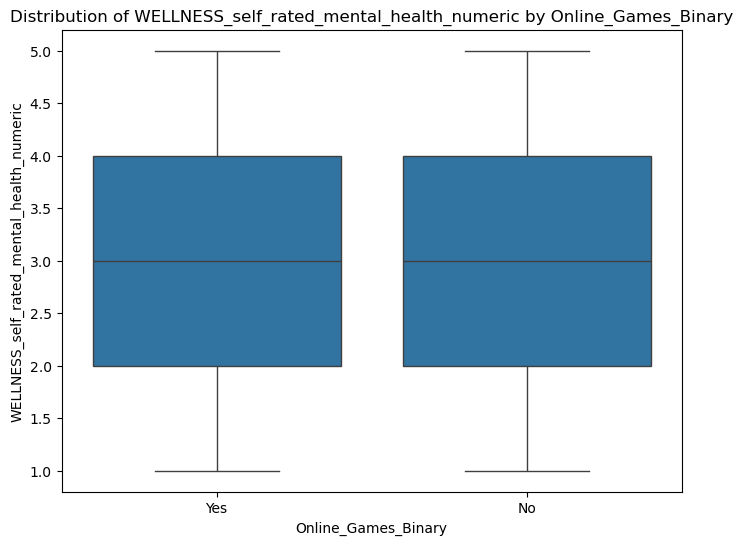

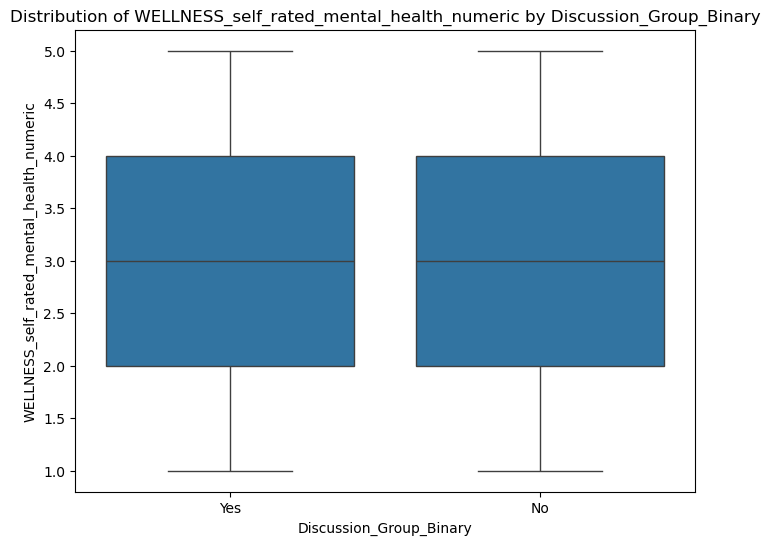

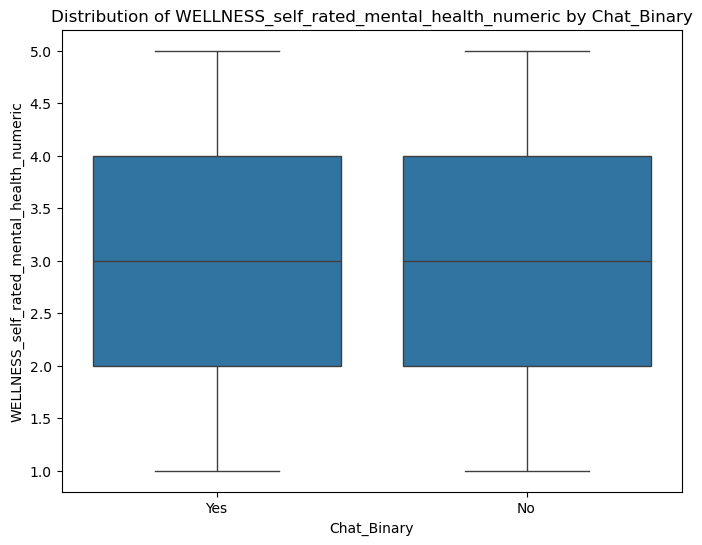

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of mental health scores for each group
for var in binary_predictors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[var], y=data[mental_health_var])
    plt.title(f"Distribution of {mental_health_var} by {var}")
    plt.show()

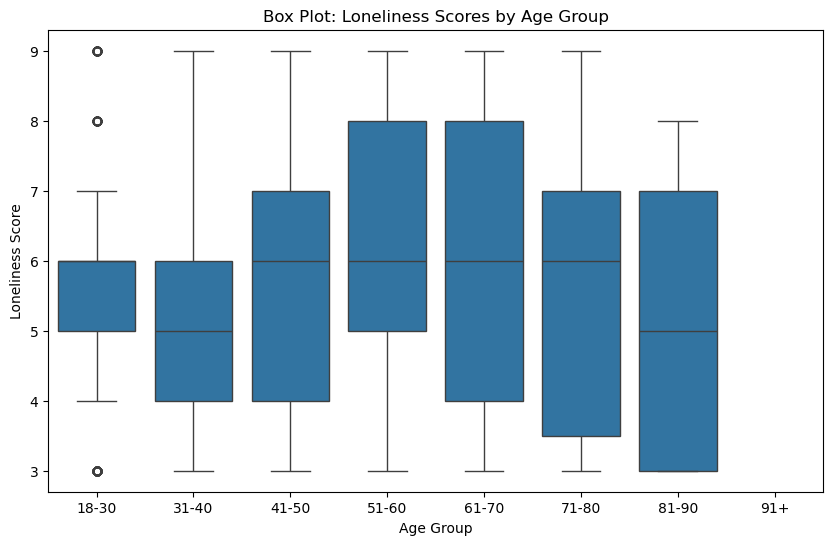

In [4]:
# Create bins for age
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
data['Age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='LONELY_ucla_loneliness_scale_score', data=data)
plt.title('Box Plot: Loneliness Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Loneliness Score')
plt.show()

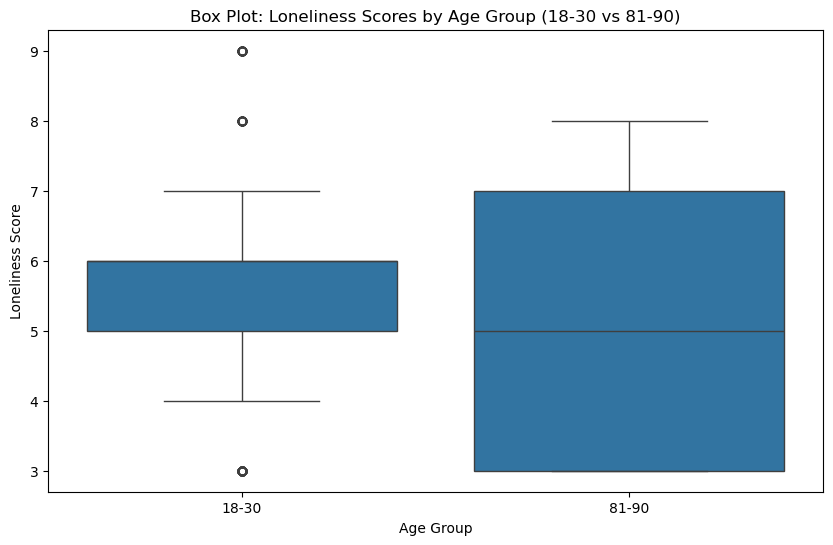

T-statistic: 0.7665
P-value: 0.4435


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
group_18_30 = data[data['Age_group'] == '18-30']['LONELY_ucla_loneliness_scale_score']
group_81_90 = data[data['Age_group'] == '81-90']['LONELY_ucla_loneliness_scale_score']

# Perform the t-test
t_stat, p_value = ttest_ind(group_18_30.dropna(), group_81_90.dropna())

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='LONELY_ucla_loneliness_scale_score', data=data, order=['18-30', '81-90'])

# Add significance stars based on p-value
if p_value < 0.001:
    significance = '***'
elif p_value < 0.01:
    significance = '**'
elif p_value < 0.05:
    significance = '*'
else:
    significance = 'ns'  # Not significant

# Annotate the plot with the significance stars
plt.annotate(f'P = {p_value:.4f} {significance}', 
             xy=(0.5, max(data['LONELY_ucla_loneliness_scale_score'])), 
             xytext=(0.5, max(data['LONELY_ucla_loneliness_scale_score']) + 2),
             ha='center', va='center', 
             fontsize=12, color='black', 
             arrowprops=dict(arrowstyle='->', color='black'))

# Add title and labels
plt.title('Box Plot: Loneliness Scores by Age Group (18-30 vs 81-90)')
plt.xlabel('Age Group')
plt.ylabel('Loneliness Score')

# Show the plot
plt.show()

# Print the results of the t-test
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


/tmp/ipykernel_53/1894516453.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


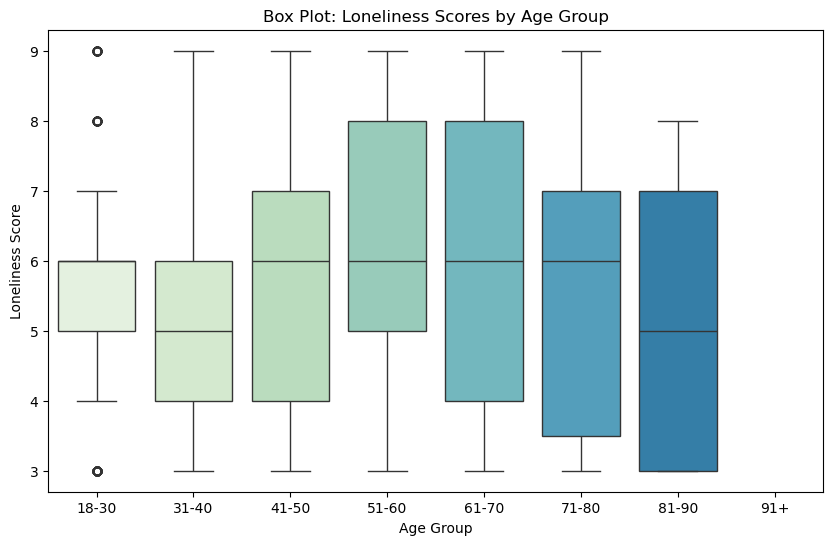

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
data['Age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Define the greeting order and length for the color palette (assuming you have a greeting order variable)
greeting_order = ['Greeted', 'Not Greeted']  # This should be based on your actual data structure

# Create the box plot with the color palette
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Age_group', 
    y='LONELY_ucla_loneliness_scale_score', 
    data=data, 
    palette=sns.color_palette("GnBu", len(age_labels))  # Apply the color palette
)

# Add title and labels
plt.title('Box Plot: Loneliness Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Loneliness Score')

# Show the plot
plt.show()

In [15]:
# Drop rows where any of the key variables are NaN
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health', 'LONELY_ucla_loneliness_scale_score']].dropna()

# Ensure the cleaned data is correctly shaped and show the first few rows
print(cleaned_data.head())

    DEMO_age WELLNESS_self_rated_mental_health  \
4       30.0                         Very good   
8       66.0                              Poor   
10      27.0                         Very good   
13      48.0                              Fair   
19      73.0                              Good   

    LONELY_ucla_loneliness_scale_score  
4                                  4.0  
8                                  9.0  
10                                 5.0  
13                                 6.0  
19                                 6.0  


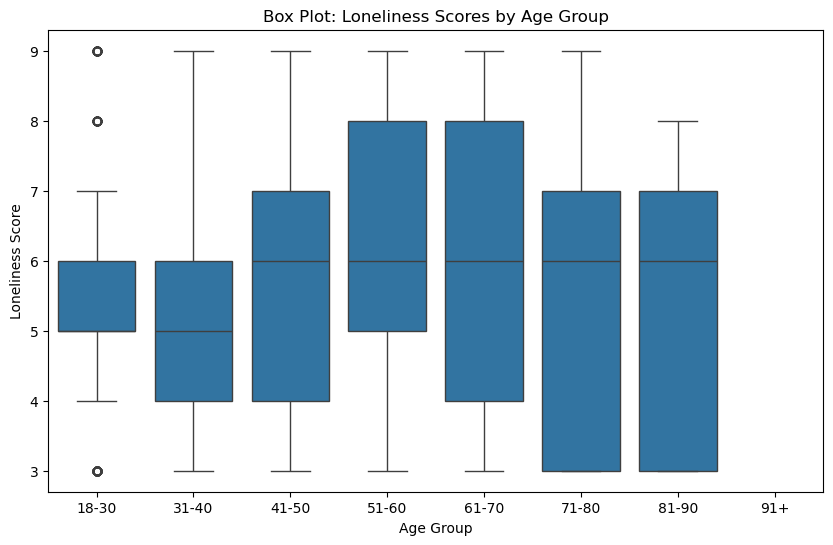

In [17]:
# Create age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Box plot to compare loneliness scores by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='LONELY_ucla_loneliness_scale_score', data=cleaned_data)
plt.title('Box Plot: Loneliness Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Loneliness Score')
plt.show()

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values (rows where conversion failed)
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health', 'LONELY_ucla_loneliness_scale_score']].dropna()

# Define younger and older groups
younger_group = cleaned_data[cleaned_data['DEMO_age'] < 30]['WELLNESS_self_rated_mental_health']
older_group = cleaned_data[cleaned_data['DEMO_age'] >= 60]['WELLNESS_self_rated_mental_health']

# Perform a T-test
t_stat, p_value = ttest_ind(younger_group, older_group, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Significance stars function
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

# Print significance level
print(f"Significance: {significance_stars(p_value)}")

T-statistic: 6.9021592300899295, P-value: 1.0571041331420516e-11
Significance: ***


/tmp/ipykernel_53/1982961392.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_53/1982961392.py:51: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


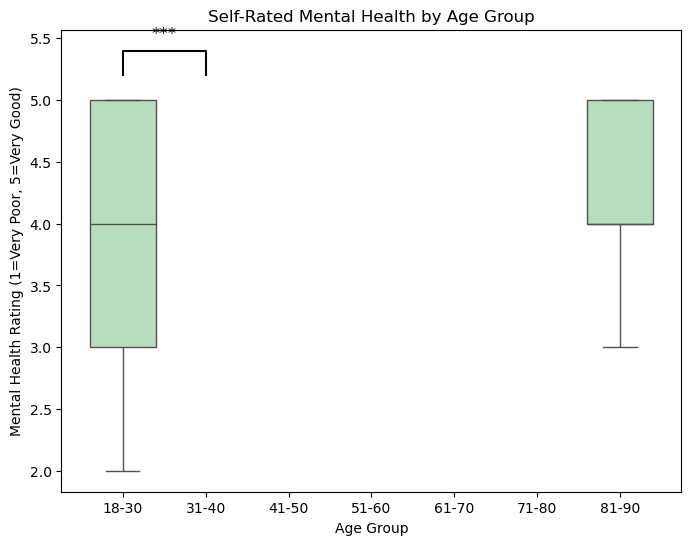

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Select only 18-30 and 81-90 age groups
filtered_data = cleaned_data[cleaned_data['Age_group'].isin(['18-30', '81-90'])]

# Perform t-test
younger_group = filtered_data[filtered_data['Age_group'] == '18-30']['WELLNESS_self_rated_mental_health']
older_group = filtered_data[filtered_data['Age_group'] == '81-90']['WELLNESS_self_rated_mental_health']
t_stat, p_value = ttest_ind(younger_group, older_group, equal_var=False)

# Define significance level function
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Age_group',
    y='WELLNESS_self_rated_mental_health',
    data=filtered_data,
    palette=sns.color_palette("GnBu", 2)  # Color palette
)

# Add significance annotation
x1, x2 = 0, 1  # Position of the two groups on x-axis
y_max = filtered_data['WELLNESS_self_rated_mental_health'].max() + 0.2  # Y position for significance bar

plt.plot([x1, x1, x2, x2], [y_max, y_max + 0.2, y_max + 0.2, y_max], lw=1.5, c='black')
plt.text((x1 + x2) / 2, y_max + 0.3, significance_stars(p_value), ha='center', fontsize=12)

# Labels and title
plt.title('Self-Rated Mental Health by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mental Health Rating (1=Very Poor, 5=Very Good)')

plt.show()

/tmp/ipykernel_53/612742996.py:17: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Data preview:    DEMO_age  WELLNESS_self_rated_mental_health Age_group
0      71.0                                2.0     71-80
1      69.0                                5.0     61-70
2      56.0                                5.0     51-60
3      54.0                                2.0     51-60
4      30.0                                5.0     31-40
P-values: {'31-40': 0.010921538172107724, '41-50': 1.7389627053861223e-21, '51-60': 4.536756711068141e-28, '61-70': 3.531916590291898e-16, '71-80': 0.033257837095584934, '81-90': 4.539822658001458e-05, '91+': 0.029328530431139654}


/tmp/ipykernel_53/612742996.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


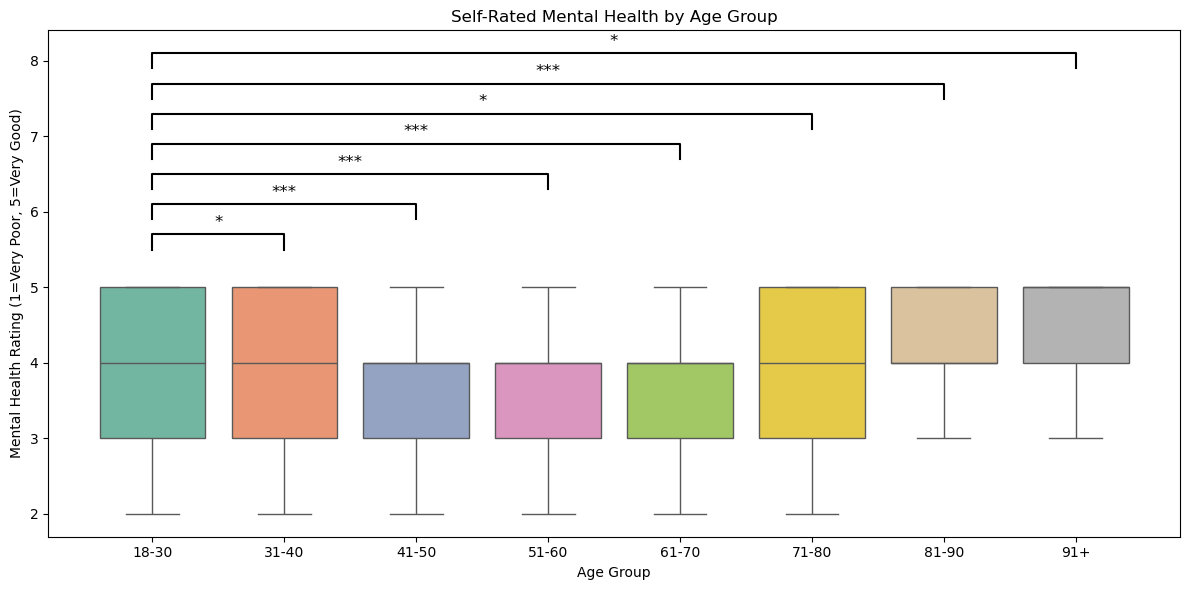

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Example DataFrame for testing (replace with your own data)
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Perform t-test for each group against the 18-30 group
age_groups = age_labels[1:]  # Excluding '18-30'
p_values = {}
for age in age_groups:
    group = cleaned_data[cleaned_data['Age_group'] == age]['WELLNESS_self_rated_mental_health']
    younger_group = cleaned_data[cleaned_data['Age_group'] == '18-30']['WELLNESS_self_rated_mental_health']
    t_stat, p_value = ttest_ind(younger_group, group, equal_var=False)
    p_values[age] = p_value

# Check if the data is correct
print("Data preview:", cleaned_data.head())
print("P-values:", p_values)

# Create the box plot with all age groups
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Age_group',
    y='WELLNESS_self_rated_mental_health',
    data=cleaned_data,
    palette="Set2"  # Palette for different age groups
)

# Annotate significance
y_max = cleaned_data['WELLNESS_self_rated_mental_health'].max() + 0.5  # Max y value plus some margin
for i, age in enumerate(age_groups):
    if p_values[age] < 0.05:  # Only annotate if significant
        x1 = 0  # Position of the '18-30' group
        x2 = i + 1  # Position of the current age group
        plt.plot([x1, x1, x2, x2], [y_max, y_max + 0.2, y_max + 0.2, y_max], lw=1.5, c='black')
        plt.text((x1 + x2) / 2, y_max + 0.3, f'{"*" * int(p_values[age] < 0.001) + ("*" * int(p_values[age] < 0.01)) + ("*" * int(p_values[age] < 0.05))}', ha='center', fontsize=12)
        y_max += 0.4  # Increment the y_max for next annotations

# Labels and title
plt.title('Self-Rated Mental Health by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mental Health Rating (1=Very Poor, 5=Very Good)')

# Show the plot
plt.tight_layout()  # To ensure the layout adjusts well and all elements are visible
plt.show()

/tmp/ipykernel_53/2285443765.py:17: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Data preview:    DEMO_age  WELLNESS_self_rated_mental_health Age_group
0      71.0                                2.0     71-80
1      69.0                                5.0     61-70
2      56.0                                5.0     51-60
3      54.0                                2.0     51-60
4      30.0                                5.0     31-40
P-values: {'18-30': 1.7389627053861223e-21, '31-40': 3.409639856898392e-13, '41-50': 1.0, '61-70': 0.008812020704409179, '71-80': 1.9460490153422442e-10, '81-90': 7.484860538164015e-19, '91+': 0.0011743023474337188}


/tmp/ipykernel_53/2285443765.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


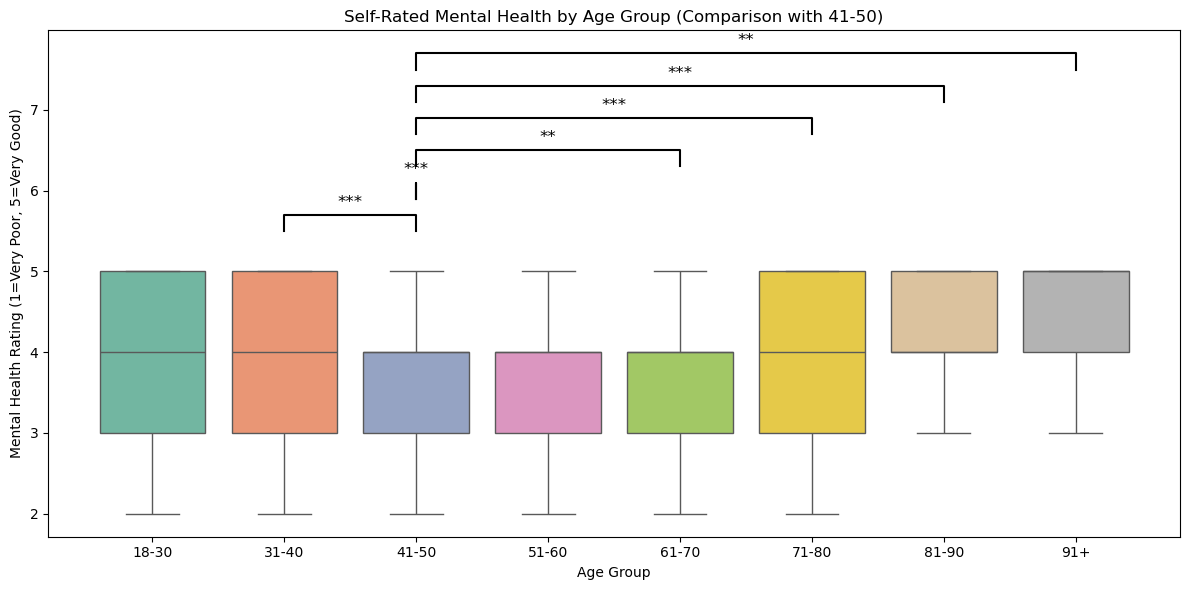

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Example DataFrame for testing (replace with your own data)
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Perform t-test for each group against the 41-50 group
age_groups = age_labels[:3] + age_labels[4:]  # Exclude '41-50' group
p_values = {}
for age in age_groups:
    group = cleaned_data[cleaned_data['Age_group'] == age]['WELLNESS_self_rated_mental_health']
    middle_group = cleaned_data[cleaned_data['Age_group'] == '41-50']['WELLNESS_self_rated_mental_health']
    t_stat, p_value = ttest_ind(middle_group, group, equal_var=False)
    p_values[age] = p_value

# Check if the data is correct
print("Data preview:", cleaned_data.head())
print("P-values:", p_values)

# Create the box plot with all age groups
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Age_group',
    y='WELLNESS_self_rated_mental_health',
    data=cleaned_data,
    palette="Set2"  # Palette for different age groups
)

# Annotate significance
y_max = cleaned_data['WELLNESS_self_rated_mental_health'].max() + 0.5  # Max y value plus some margin
for i, age in enumerate(age_groups):
    if p_values[age] < 0.05:  # Only annotate if significant
        x1 = 2  # Position of the '41-50' group
        x2 = i + 1  # Position of the current age group
        plt.plot([x1, x1, x2, x2], [y_max, y_max + 0.2, y_max + 0.2, y_max], lw=1.5, c='black')
        plt.text((x1 + x2) / 2, y_max + 0.3, f'{"*" * int(p_values[age] < 0.001) + ("*" * int(p_values[age] < 0.01)) + ("*" * int(p_values[age] < 0.05))}', ha='center', fontsize=12)
        y_max += 0.4  # Increment the y_max for next annotations

# Labels and title
plt.title('Self-Rated Mental Health by Age Group (Comparison with 41-50)')
plt.xlabel('Age Group')
plt.ylabel('Mental Health Rating (1=Very Poor, 5=Very Good)')

# Show the plot
plt.tight_layout()  # To ensure the layout adjusts well and all elements are visible
plt.show()

  Group_Comparison  Effect_Size
0  71-91+ vs 41-70     0.355862
1  71-91+ vs 18-40     0.023562
2    71-91+ vs nan          NaN
3   41-70 vs 18-40    -0.324834
4     41-70 vs nan          NaN


/tmp/ipykernel_53/2345899087.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")


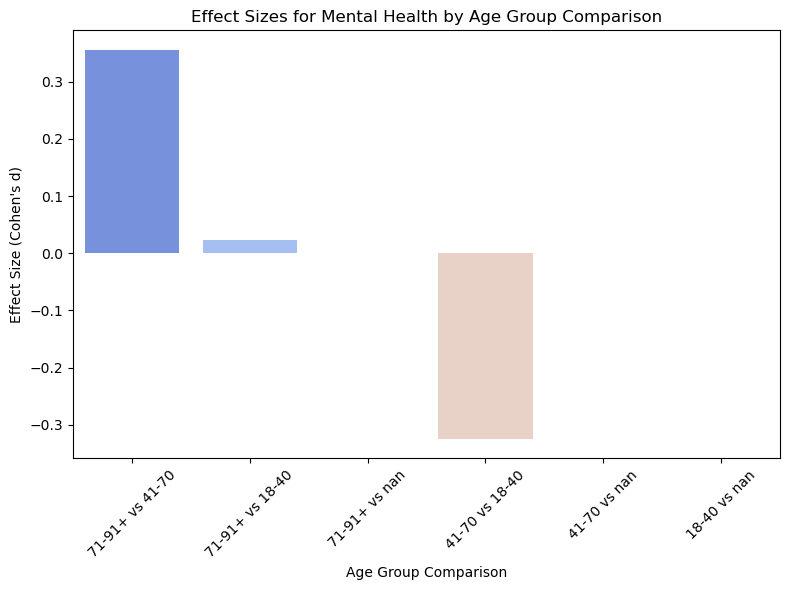

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Define new age groups
age_bins = [18, 40, 70, 100]
age_labels = ['18-40', '41-70', '71-91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Perform effect size comparisons
groups = cleaned_data['Age_group'].unique()
effect_sizes = []

# Manual calculation of Cohen's d
def cohen_d_calc(group1, group2):
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 + (len(group2)-1)*group2.std()**2) / (len(group1)+len(group2)-2))
    return diff / pooled_std

# Loop over each pair of age groups
for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        if i < j:
            group1_data = cleaned_data[cleaned_data['Age_group'] == group1]['WELLNESS_self_rated_mental_health']
            group2_data = cleaned_data[cleaned_data['Age_group'] == group2]['WELLNESS_self_rated_mental_health']
            
            # Calculate Cohen's d for the two groups
            d_value = cohen_d_calc(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d_value
            })

# Convert effect sizes into a DataFrame
effect_sizes_df = pd.DataFrame(effect_sizes)

# Check the DataFrame structure
print(effect_sizes_df.head())

# Plotting the effect sizes
if not effect_sizes_df.empty:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")
    plt.title("Effect Sizes for Mental Health by Age Group Comparison")
    plt.xlabel("Age Group Comparison")
    plt.ylabel("Effect Size (Cohen's d)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid effect sizes to plot.")

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define the rating mapping
rating_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Very good': 5
}

# Apply the mapping to convert categorical ratings to numeric values
data['WELLNESS_self_rated_mental_health'] = data['WELLNESS_self_rated_mental_health'].map(rating_mapping)

# Convert to numeric explicitly (in case of errors)
data['WELLNESS_self_rated_mental_health'] = pd.to_numeric(data['WELLNESS_self_rated_mental_health'], errors='coerce')

# Remove NaN values before proceeding
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Check the distribution of 'DEMO_age' to ensure it's within the expected range
print("Age distribution:")
print(cleaned_data['DEMO_age'].describe())

# Define new age groups
age_bins = [18, 40, 70, 100]
age_labels = ['18-40', '41-70', '71-91+']
cleaned_data['Age_group'] = pd.cut(cleaned_data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Check the counts of each group after binning
group_counts = cleaned_data['Age_group'].value_counts()
print("Group counts after binning:", group_counts)

# Perform effect size comparisons
groups = cleaned_data['Age_group'].unique()
effect_sizes = []

# Manual calculation of Cohen's d
def cohen_d_calc(group1, group2):
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 + (len(group2)-1)*group2.std()**2) / (len(group1)+len(group2)-2))
    return diff / pooled_std

# Loop over each pair of age groups
for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        if i < j:
            group1_data = cleaned_data[cleaned_data['Age_group'] == group1]['WELLNESS_self_rated_mental_health']
            group2_data = cleaned_data[cleaned_data['Age_group'] == group2]['WELLNESS_self_rated_mental_health']
            
            # Skip comparisons if any group has insufficient data
            if len(group1_data) < 2 or len(group2_data) < 2:
                continue
            
            # Calculate Cohen's d for the two groups
            d_value = cohen_d_calc(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d_value
            })

# Convert effect sizes into a DataFrame
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plotting the effect sizes
if not effect_sizes_df.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")
    plt.title("Effect Sizes for Mental Health by Age Group Comparison")
    plt.xlabel("Age Group Comparison")
    plt.ylabel("Effect Size (Cohen's d)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid effect sizes to plot.")

Age distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DEMO_age, dtype: float64
Group counts after binning: Age_group
18-40     0
41-70     0
71-91+    0
Name: count, dtype: int64
No valid effect sizes to plot.


In [39]:
# Check the first few rows of the DEMO_age column to understand the problem
print("First few rows of 'DEMO_age':")
print(data['DEMO_age'].head())

# Check for missing or NaN values
print("\nChecking for NaN values in 'DEMO_age':")
print(data['DEMO_age'].isna().sum())

# If the 'DEMO_age' column is not numeric, let's try to convert it and handle errors
data['DEMO_age'] = pd.to_numeric(data['DEMO_age'], errors='coerce')

# Check if there are still NaN values after conversion
print("\nChecking for NaN values after conversion:")
print(data['DEMO_age'].isna().sum())

# Remove rows where 'DEMO_age' is NaN
cleaned_data = data[['DEMO_age', 'WELLNESS_self_rated_mental_health']].dropna()

# Check the distribution of 'DEMO_age' after cleaning
print("\nAge distribution after cleaning:")
print(cleaned_data['DEMO_age'].describe())

First few rows of 'DEMO_age':
0    71.0
1    69.0
2    56.0
3    54.0
4    30.0
Name: DEMO_age, dtype: float64

Checking for NaN values in 'DEMO_age':
1211

Checking for NaN values after conversion:
1211

Age distribution after cleaning:
count    8428.000000
mean       46.732795
std        17.999698
min        16.000000
25%        30.000000
50%        45.000000
75%        62.000000
max        96.000000
Name: DEMO_age, dtype: float64


In [40]:
# Check unique values in the 'DEMO_age' column to see if there are any unexpected values
print("Unique values in 'DEMO_age':")
print(data['DEMO_age'].unique())

# Also check the data types of the columns to confirm if there are any unexpected types
print("\nData types of the columns:")
print(data.dtypes)

Unique values in 'DEMO_age':
[71. 69. 56. 54. 30. 55. 50. 52. 66. 76. 27. 49. 57. 48. 74. 38. 73. nan
 59. 44. 42. 63. 67. 32. 51. 29. 46. 28. 68. 23. 39. 26. 77. 75. 25. 60.
 70. 31. 85. 36. 35. 24. 61. 81. 62. 33. 72. 19. 45. 20. 18. 37. 21. 65.
 34. 58. 91. 64. 40. 22. 78. 53. 47. 43. 96. 79. 83. 80. 17. 16. 41. 93.
 84. 92. 82. 86. 89. 88. 87. 90.]

Data types of the columns:
UNIQUE_id                                        object
UNIQUE_num_records                                int64
ELIGIBLE_consent                                 object
GEO_residence_canada                             object
GEO_province                                     object
                                                 ...   
PSYCH_big_five_inventory_conscientious_score    float64
PSYCH_big_five_inventory_extraverted_score      float64
PSYCH_big_five_inventory_neurotic_score         float64
PSYCH_big_five_inventory_open_score             float64
REMOVE_case                                      object
L

In [41]:
# Remove rows with NaN values in the 'DEMO_age' column
data_cleaned = data.dropna(subset=['DEMO_age'])

# Check again for NaN values in 'DEMO_age'
print("\nAfter cleaning, checking NaN values in 'DEMO_age':")
print(data_cleaned['DEMO_age'].isna().sum())

# Now proceed with the age binning
age_bins = [18, 40, 70, 91]
age_labels = ['18-40', '41-70', '71-91+']
data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Check the distribution of age groups
print("\nAge group distribution after cleaning:")
print(data_cleaned['Age_group'].value_counts())


After cleaning, checking NaN values in 'DEMO_age':
0

Age group distribution after cleaning:
Age_group
41-70     4494
18-40     4381
71-91+    1286
Name: count, dtype: int64


/tmp/ipykernel_53/2402105293.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=age_bins, labels=age_labels, right=False)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

# Ensure data has been cleaned and grouped
data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=[17, 40, 70, 100], 
                                   labels=['18-40', '41-70', '71-91+'])

# Check counts per group
group_counts = data_cleaned['Age_group'].value_counts()
print("Group counts:\n", group_counts)

# Make sure we're checking the specific column 'WELLNESS_self_rated_mental_health'
print(f"First few values of 'WELLNESS_self_rated_mental_health': {data_cleaned['WELLNESS_self_rated_mental_health'].head()}")

# Ensure we remove NaN values from the 'WELLNESS_self_rated_mental_health' column
data_cleaned = data_cleaned.dropna(subset=['WELLNESS_self_rated_mental_health'])

# Grouping data into age groups
age_groups = ['18-40', '41-70', '71-91+']
effect_sizes = []
age_combinations = [('18-40', '41-70'), ('18-40', '71-91+'), ('41-70', '71-91+')]

# Function to calculate Cohen's d
def cohen_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    pooled_std = np.sqrt((std1**2 + std2**2) / 2)
    return (mean1 - mean2) / pooled_std

# Calculate effect sizes for each pair
for group1, group2 in age_combinations:
    group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health']
    group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health']
    
    # Check the length of each group after NaN removal
    print(f"Group 1 ({group1}) length: {len(group1_data)}")
    print(f"Group 2 ({group2}) length: {len(group2_data)}")
    
    # Check if both groups have data
    if len(group1_data) > 0 and len(group2_data) > 0:
        # Calculate Cohen's d
        effect_size = cohen_d(group1_data, group2_data)
        effect_sizes.append({'Group_Comparison': f'{group1} vs {group2}', 'Effect_Size': effect_size})
    else:
        print(f"Skipping comparison for {group1} vs {group2} due to insufficient data.")

# Convert effect sizes to DataFrame
effect_sizes_df = pd.DataFrame(effect_sizes)

# Check if we have valid data for plotting
if effect_sizes_df.empty:
    print("No valid effect sizes to plot.")
else:
    # Plotting the effect sizes
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")

    # Add title and labels
    plt.title("Effect Sizes for Mental Health by Age Group Comparison")
    plt.xlabel("Age Group Comparison")
    plt.ylabel("Cohen's d (Effect Size)")

    # Show the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Group counts:
 Age_group
18-40     4525
41-70     4514
71-91+    1135
Name: count, dtype: int64
First few values of 'WELLNESS_self_rated_mental_health': 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: WELLNESS_self_rated_mental_health, dtype: float64
Group 1 (18-40) length: 0
Group 2 (41-70) length: 0
Skipping comparison for 18-40 vs 41-70 due to insufficient data.
Group 1 (18-40) length: 0
Group 2 (71-91+) length: 0
Skipping comparison for 18-40 vs 71-91+ due to insufficient data.
Group 1 (41-70) length: 0
Group 2 (71-91+) length: 0
Skipping comparison for 41-70 vs 71-91+ due to insufficient data.
No valid effect sizes to plot.


/tmp/ipykernel_53/636962589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=[17, 40, 70, 100],


In [33]:
# Check for missing values in the 'WELLNESS_self_rated_mental_health' column
print(f"Missing values in 'WELLNESS_self_rated_mental_health': {data_cleaned['WELLNESS_self_rated_mental_health'].isna().sum()}")

# Check the distribution of non-missing values in 'WELLNESS_self_rated_mental_health'
print(f"Distribution of non-NaN values in 'WELLNESS_self_rated_mental_health':\n",
      data_cleaned['WELLNESS_self_rated_mental_health'].dropna().describe())

Missing values in 'WELLNESS_self_rated_mental_health': 0
Distribution of non-NaN values in 'WELLNESS_self_rated_mental_health':
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: WELLNESS_self_rated_mental_health, dtype: float64


In [34]:
# Check the exact column name to ensure there are no hidden characters
print(data_cleaned.columns[data_cleaned.columns.str.contains('WELLNESS_self_rated_mental_health')])

Index(['WELLNESS_self_rated_mental_health'], dtype='object')


In [43]:
# Verify the non-null values of DEMO_age and its unique values
print("Non-null ages:", data_cleaned['DEMO_age'].notnull().sum())
print("Unique ages:", data_cleaned['DEMO_age'].unique())

# Check how many records end up in each group after binning
bins = [18, 40, 70, 91]
labels = ['18-40', '41-70', '71-91+']
data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=bins, labels=labels, right=True)

# Check group counts
group_counts = data_cleaned['Age_group'].value_counts()
print("Group counts:", group_counts)

Non-null ages: 10220
Unique ages: [71. 69. 56. 54. 30. 55. 50. 52. 66. 76. 27. 49. 57. 48. 74. 38. 73. 59.
 44. 42. 63. 67. 32. 51. 29. 46. 28. 68. 23. 39. 26. 77. 75. 25. 60. 70.
 31. 85. 36. 35. 24. 61. 81. 62. 33. 72. 19. 45. 20. 18. 37. 21. 65. 34.
 58. 91. 64. 40. 22. 78. 53. 47. 43. 96. 79. 83. 80. 17. 16. 41. 93. 84.
 92. 82. 86. 89. 88. 87. 90.]
Group counts: Age_group
41-70     4514
18-40     4413
71-91+    1130
Name: count, dtype: int64


/tmp/ipykernel_53/3497567298.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = pd.cut(data_cleaned['DEMO_age'], bins=bins, labels=labels, right=True)


In [44]:
# Check if 'WELLNESS_self_rated_mental_health' has non-NaN values
non_nan_mental_health = data_cleaned['WELLNESS_self_rated_mental_health'].notnull().sum()
print("Non-NaN WELLNESS_self_rated_mental_health values:", non_nan_mental_health)

# Check the unique values for the 'WELLNESS_self_rated_mental_health'
print("Unique values in WELLNESS_self_rated_mental_health:", data_cleaned['WELLNESS_self_rated_mental_health'].unique())

Non-NaN WELLNESS_self_rated_mental_health values: 8428
Unique values in WELLNESS_self_rated_mental_health: ['Poor' 'Very good' 'Good' 'Fair' 'Excellent' nan]


In [46]:
# Map the categorical values to numerical values
mental_health_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

data_cleaned['WELLNESS_self_rated_mental_health_numeric'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mental_health_map)

# Check if the mapping worked
print(data_cleaned[['WELLNESS_self_rated_mental_health', 'WELLNESS_self_rated_mental_health_numeric']].head())

  WELLNESS_self_rated_mental_health  WELLNESS_self_rated_mental_health_numeric
0                              Poor                                        1.0
1                         Very good                                        4.0
2                         Very good                                        4.0
3                              Poor                                        1.0
4                         Very good                                        4.0


/tmp/ipykernel_53/2337060305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['WELLNESS_self_rated_mental_health_numeric'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mental_health_map)


/tmp/ipykernel_53/145124508.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")


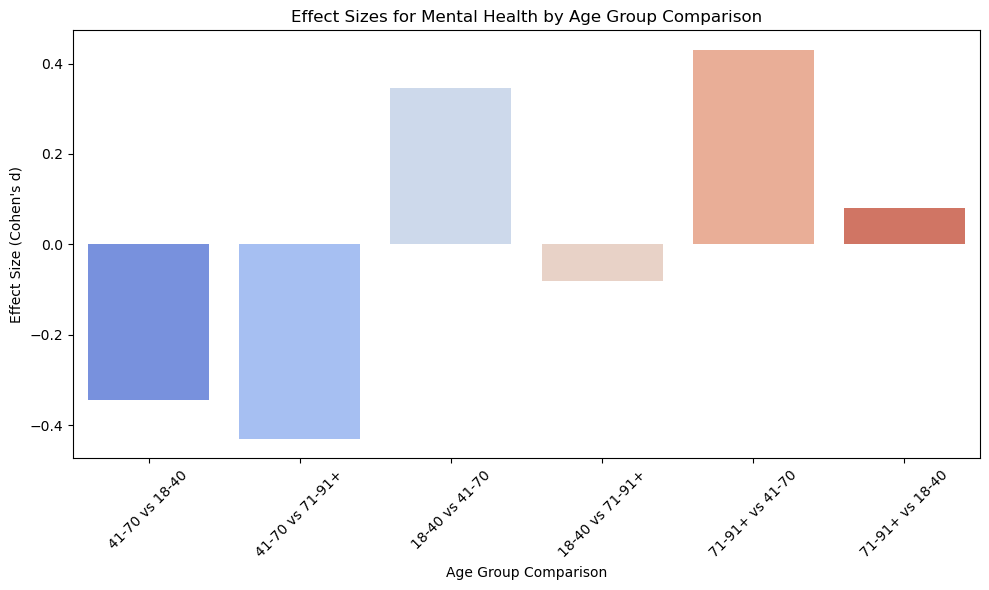

In [47]:
# Calculate effect size (Cohen's d)
def cohen_d(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std

# Recalculate effect size for the age groups and mental health ratings
effect_sizes = []
for group1 in group_counts.index:
    for group2 in group_counts.index:
        if group1 != group2:
            # Filter data for group comparisons
            group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
            group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
            
            if len(group1_data) > 0 and len(group2_data) > 0:
                effect_size = cohen_d(group1_data, group2_data)
                effect_sizes.append({'Group_Comparison': f'{group1} vs {group2}', 'Effect_Size': effect_size})

# Create a DataFrame for the effect sizes
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the effect sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Effect Sizes for Mental Health by Age Group Comparison")
plt.xlabel("Age Group Comparison")
plt.ylabel("Effect Size (Cohen's d)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_53/987980208.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['WELLNESS_self_rated_mental_health_numeric'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mental_health_map)


  WELLNESS_self_rated_mental_health  WELLNESS_self_rated_mental_health_numeric
0                              Poor                                        1.0
1                         Very good                                        4.0
2                         Very good                                        4.0
3                              Poor                                        1.0
4                         Very good                                        4.0


/tmp/ipykernel_53/987980208.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")


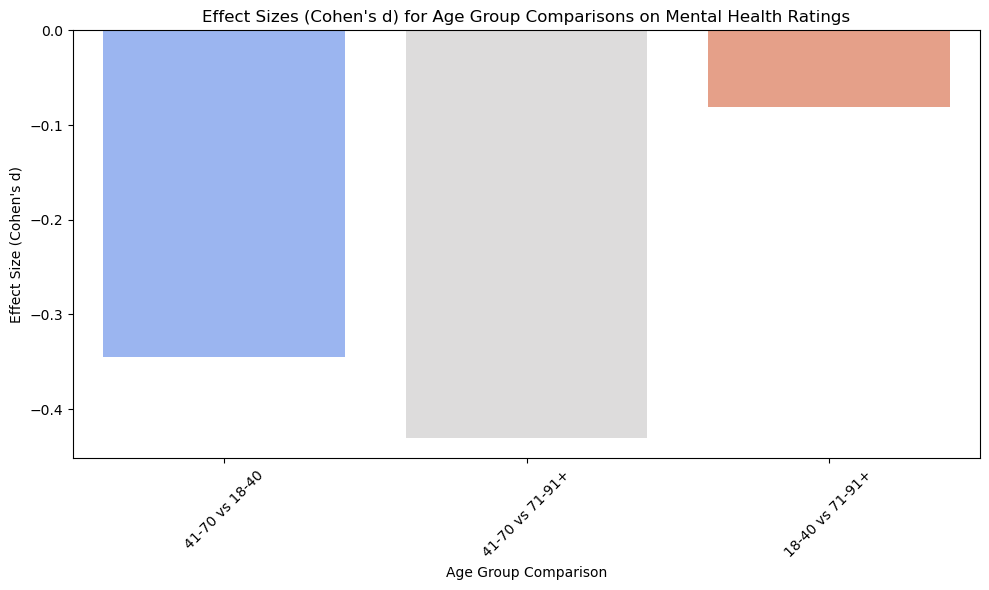

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map the categorical ratings to numeric values
mental_health_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

data_cleaned['WELLNESS_self_rated_mental_health_numeric'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mental_health_map)

# Check if the mapping worked
print(data_cleaned[['WELLNESS_self_rated_mental_health', 'WELLNESS_self_rated_mental_health_numeric']].head())

# Calculate Cohen's d for the comparison of two groups
def cohen_d(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (mean1 - mean2) / pooled_std

# Define the groups to compare
group_counts = data_cleaned['Age_group'].value_counts()
age_groups = group_counts.index.tolist()

# Initialize an empty list to store effect sizes
effect_sizes = []

# Loop through each pair of age groups and calculate Cohen's d
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        # Calculate Cohen's d
        if len(group1_data) > 0 and len(group2_data) > 0:
            effect_size = cohen_d(group1_data, group2_data)
            effect_sizes.append({'Group_Comparison': f'{group1} vs {group2}', 'Effect_Size': effect_size})

# Create a DataFrame for effect sizes
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the effect sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='Group_Comparison', y='Effect_Size', data=effect_sizes_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Effect Sizes (Cohen's d) for Age Group Comparisons on Mental Health Ratings")
plt.xlabel("Age Group Comparison")
plt.ylabel("Effect Size (Cohen's d)")
plt.tight_layout()
plt.show()

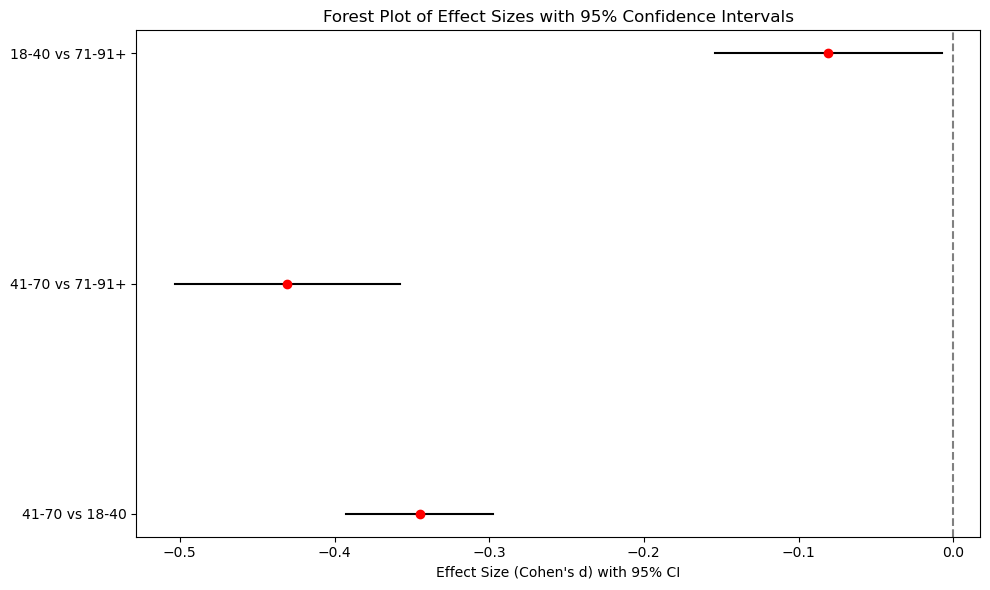

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(10, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color='black')  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'ro')  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--')

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'])
plt.xlabel("Effect Size (Cohen's d) with 95% CI")
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals")
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/2662049535.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


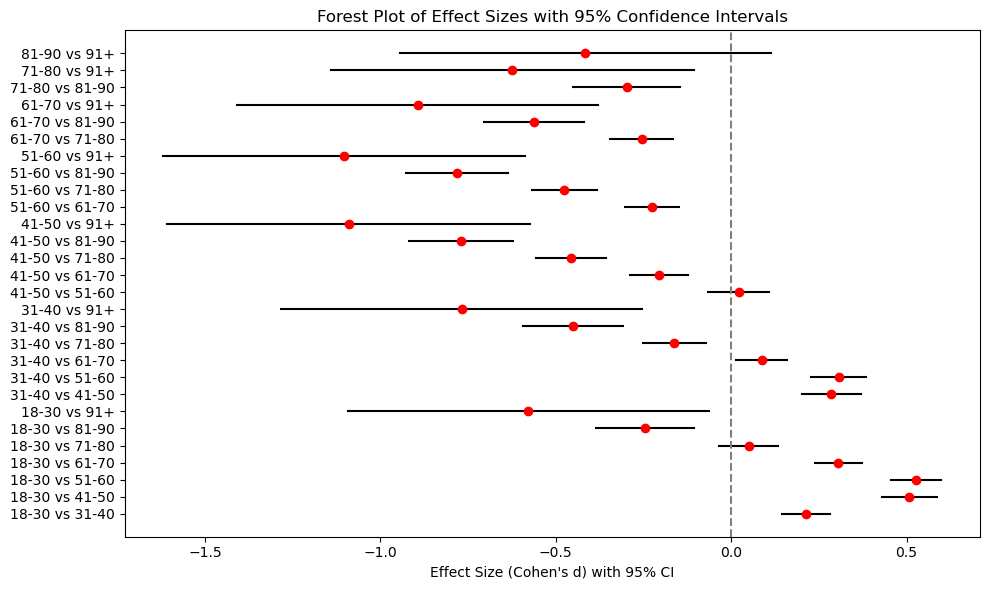

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    elif 61 <= age <= 70:
        return '61-70'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 90:
        return '81-90'
    elif age >= 91:
        return '91+'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the age groups
age_groups = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(10, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color='black')  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'ro')  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--')

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'])
plt.xlabel("Effect Size (Cohen's d) with 95% CI")
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals")
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/1848593788.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


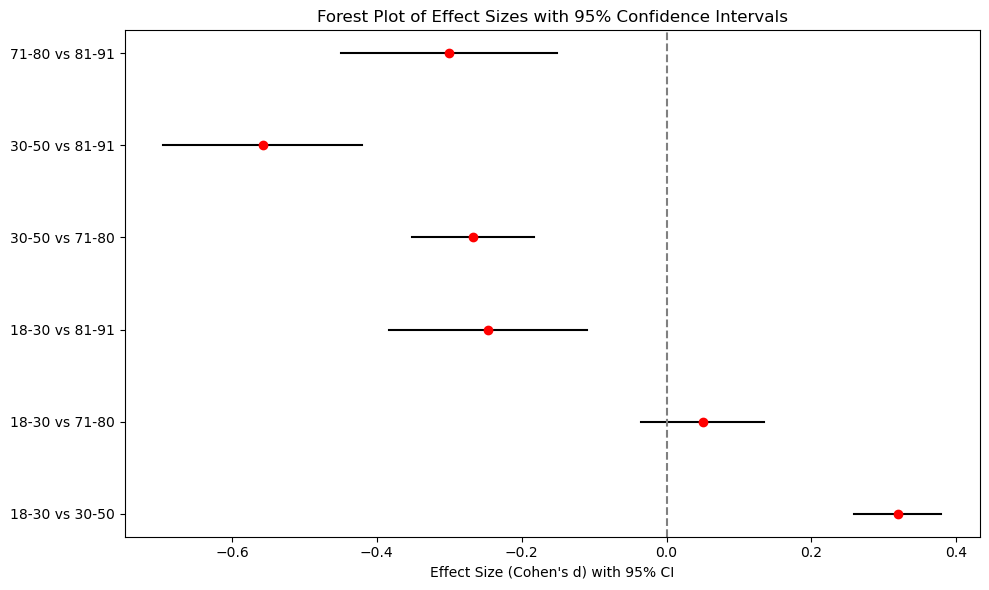

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(10, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color='black')  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'ro')  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--')

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'])
plt.xlabel("Effect Size (Cohen's d) with 95% CI")
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals")
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/3695898073.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


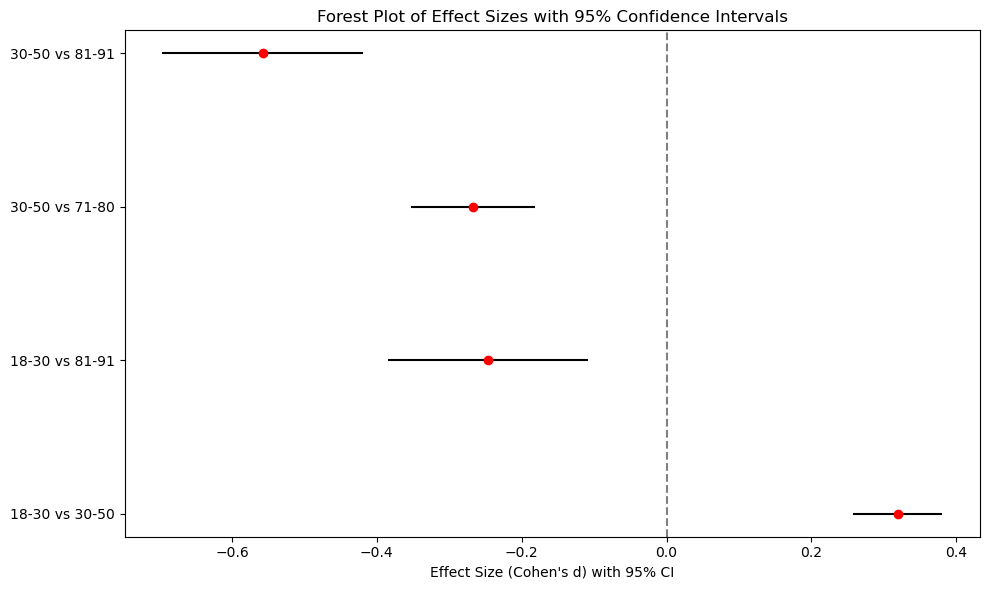

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(10, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color='black')  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'ro')  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--')

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'])
plt.xlabel("Effect Size (Cohen's d) with 95% CI")
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals")
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/1960726608.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


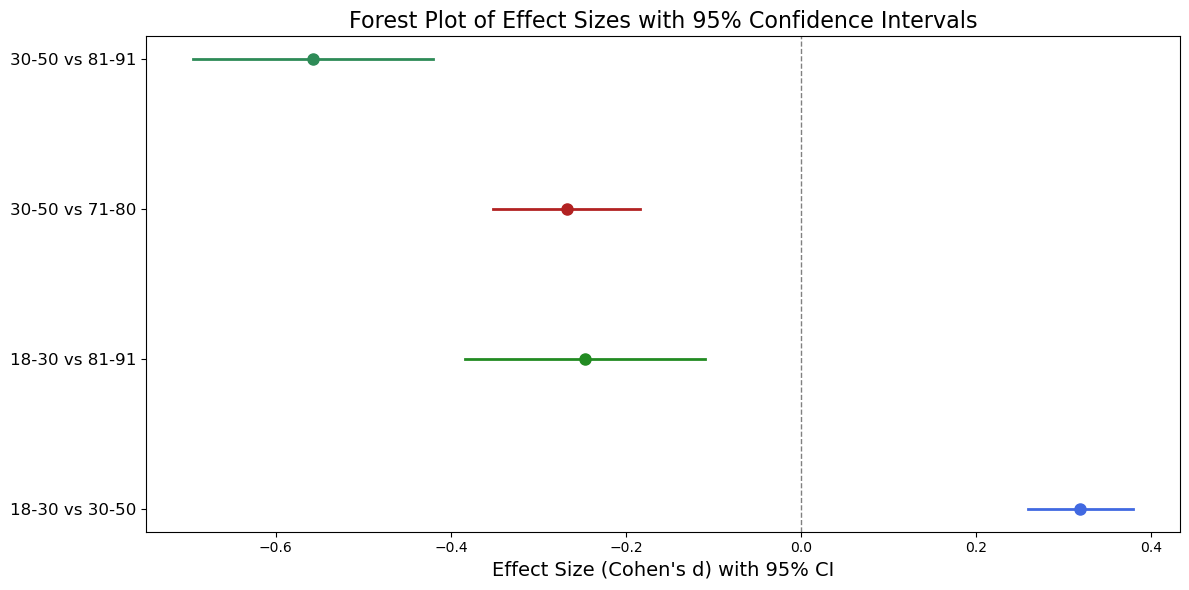

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Define custom colors for each comparison
comparison_colors = {
    ('18-30', '30-50'): 'royalblue',
    ('18-30', '71-80'): 'darkorange',
    ('18-30', '81-91'): 'forestgreen',
    ('30-50', '71-80'): 'firebrick',
    ('30-50', '81-91'): 'seagreen',
    ('71-80', '81-91'): 'purple'
}

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper,
                'Color': comparison_colors.get((group1, group2), 'black')  # Assign the color
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(12, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color=row['Color'], linewidth=2)  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'o', markersize=8, color=row['Color'])  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'], fontsize=12)
plt.xlabel("Effect Size (Cohen's d) with 95% CI", fontsize=14)
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/1960726608.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


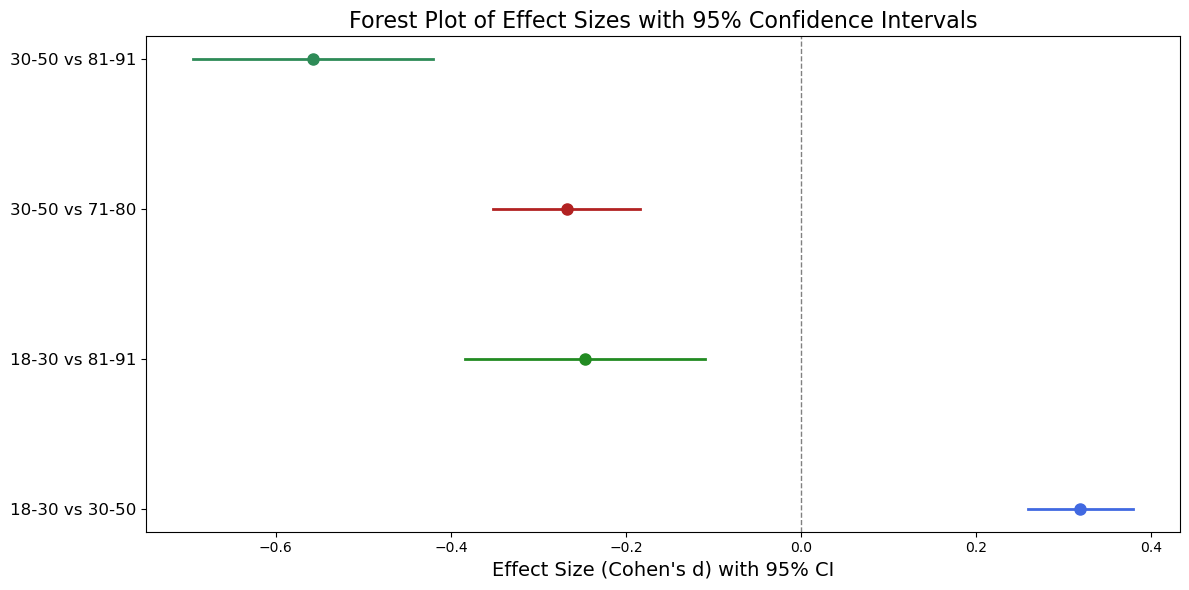

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Define custom colors for each comparison
comparison_colors = {
    ('18-30', '30-50'): 'royalblue',
    ('18-30', '71-80'): 'darkorange',
    ('18-30', '81-91'): 'forestgreen',
    ('30-50', '71-80'): 'firebrick',
    ('30-50', '81-91'): 'seagreen',
    ('71-80', '81-91'): 'purple'
}

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper,
                'Color': comparison_colors.get((group1, group2), 'black')  # Assign the color
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(12, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color=row['Color'], linewidth=2)  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'o', markersize=8, color=row['Color'])  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'], fontsize=12)
plt.xlabel("Effect Size (Cohen's d) with 95% CI", fontsize=14)
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/1515527739.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


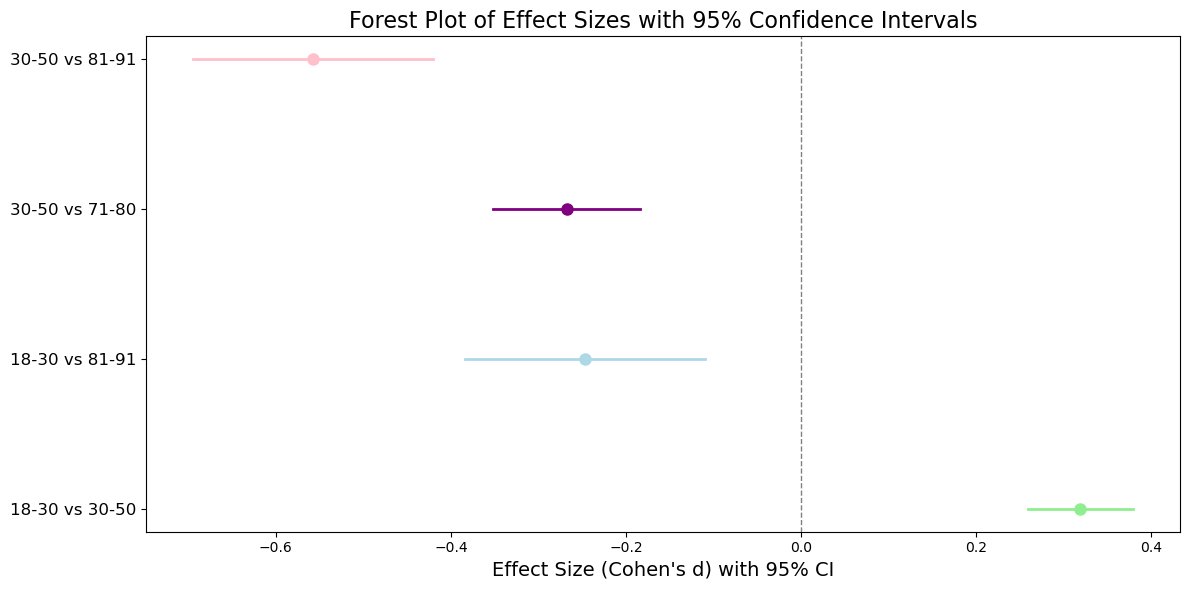

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Define custom colors for each comparison
comparison_colors = {
    ('30-50', '81-91'): 'pink',
    ('30-50', '71-80'): 'purple',
    ('18-30', '81-91'): 'lightblue',
    ('18-30', '30-50'): 'lightgreen',
}

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper,
                'Color': comparison_colors.get((group1, group2), 'black')  # Assign the color
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(12, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color=row['Color'], linewidth=2)  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'o', markersize=8, color=row['Color'])  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'], fontsize=12)
plt.xlabel("Effect Size (Cohen's d) with 95% CI", fontsize=14)
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/3894091959.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


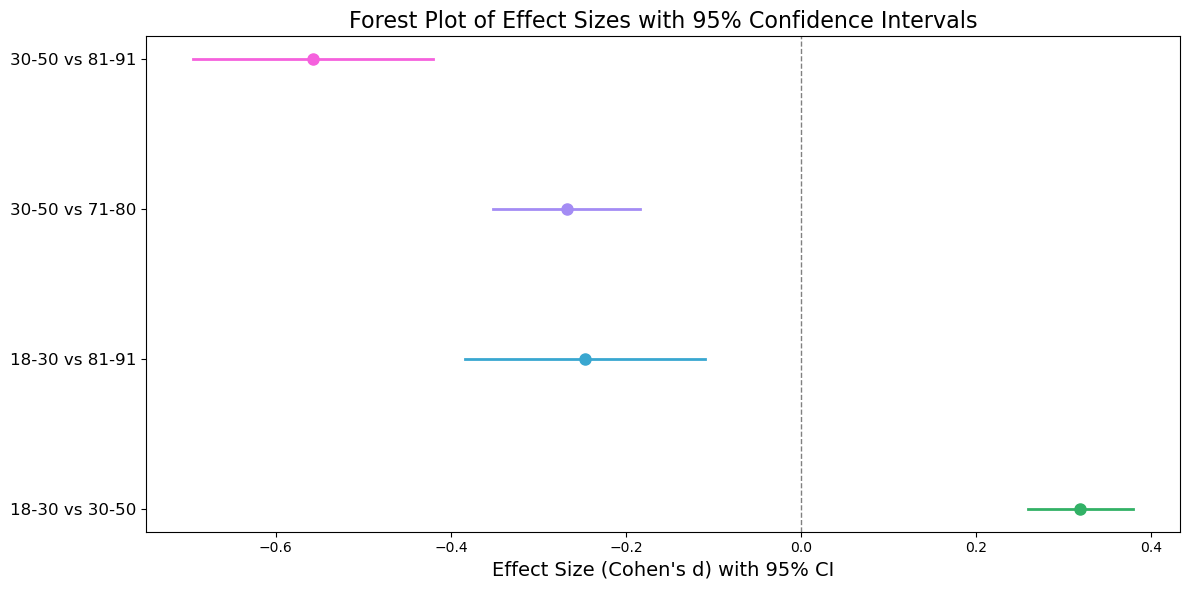

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Generate colors from sns.color_palette("husl", 8)
colors = sns.color_palette("husl", 8)

# Define custom colors for each comparison using the palette
comparison_colors = {
    ('30-50', '81-91'): colors[7],
    ('30-50', '71-80'): colors[6],
    ('18-30', '81-91'): colors[5],
    ('18-30', '30-50'): colors[3],
}

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper,
                'Color': comparison_colors.get((group1, group2), 'black')  # Assign the color
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(12, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color=row['Color'], linewidth=2)  # Confidence Interval line
    plt.plot(row['Effect_Size'], i, 'o', markersize=8, color=row['Color'])  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'], fontsize=12)
plt.xlabel("Effect Size (Cohen's d) with 95% CI", fontsize=14)
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_53/2034745601.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)


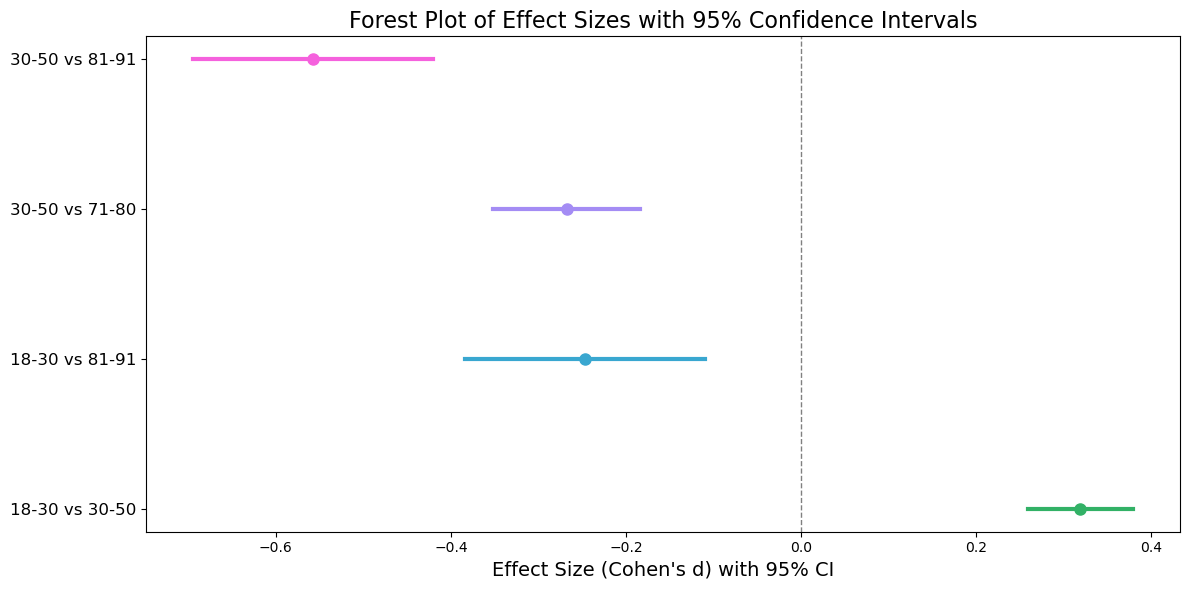

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to compute Cohen's d with confidence interval
def cohen_d_with_ci(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / pooled_std
    
    # Calculate 95% Confidence Interval
    se = np.sqrt((var1 / n1) + (var2 / n2))
    ci_lower, ci_upper = d - 1.96 * se, d + 1.96 * se
    return d, ci_lower, ci_upper

# Function to categorize ages into new bins
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 50:
        return '30-50'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 91:
        return '81-91'
    return np.nan

# Assuming data_cleaned is your cleaned dataframe

# Apply the age categorization
data_cleaned['Age_group'] = data_cleaned['DEMO_age'].apply(categorize_age)

# List of the new age groups
age_groups = ['18-30', '30-50', '71-80', '81-91']

# Generate colors from sns.color_palette("husl", 8)
colors = sns.color_palette("husl", 8)

# Define custom colors for each comparison using the palette
comparison_colors = {
    ('30-50', '81-91'): colors[7],
    ('30-50', '71-80'): colors[6],
    ('18-30', '81-91'): colors[5],
    ('18-30', '30-50'): colors[3],
}

# Prepare the data
effect_sizes = []
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        group1 = age_groups[i]
        group2 = age_groups[j]
        
        # Skip unwanted comparisons
        if (group1 == '71-80' and group2 == '81-91') or (group1 == '18-30' and group2 == '71-80'):
            continue
        
        # Extract the data for each group
        group1_data = data_cleaned[data_cleaned['Age_group'] == group1]['WELLNESS_self_rated_mental_health_numeric']
        group2_data = data_cleaned[data_cleaned['Age_group'] == group2]['WELLNESS_self_rated_mental_health_numeric']
        
        if len(group1_data) > 0 and len(group2_data) > 0:
            d, ci_lower, ci_upper = cohen_d_with_ci(group1_data, group2_data)
            effect_sizes.append({
                'Group_Comparison': f'{group1} vs {group2}',
                'Effect_Size': d,
                'CI_Lower': ci_lower,
                'CI_Upper': ci_upper,
                'Color': comparison_colors.get((group1, group2), 'black')  # Assign the color
            })

# Create a DataFrame for effect sizes and CI
effect_sizes_df = pd.DataFrame(effect_sizes)

# Plot the forest plot
plt.figure(figsize=(12, 6))

# For each effect size, plot a horizontal line with the confidence interval
for i, row in effect_sizes_df.iterrows():
    plt.plot([row['CI_Lower'], row['CI_Upper']], [i, i], color=row['Color'], linewidth=3)  # Increased line thickness
    plt.plot(row['Effect_Size'], i, 'o', markersize=8, color=row['Color'])  # Effect size as a point

# Plot the vertical line at zero (no effect)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and titles
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Group_Comparison'], fontsize=12)
plt.xlabel("Effect Size (Cohen's d) with 95% CI", fontsize=14)
plt.title("Forest Plot of Effect Sizes with 95% Confidence Intervals", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

In [51]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Assuming your DataFrame is called 'data'

# Define loneliness classification
data['loneliness_status'] = data['LONELY_ucla_loneliness_scale_score'].apply(
    lambda x: 'lonely' if 5 <= x <= 9 else ('not_lonely' if 0 <= x <=  else np.nan)
)

# Drop rows with NaN values in loneliness_status
data = data.dropna(subset=['loneliness_status'])

# Create dummy variables for 'loneliness_status'
data_dummies = pd.get_dummies(data['loneliness_status'], drop_first=True)

# Concatenate the dummies back into the original data
data = pd.concat([data, data_dummies], axis=1)

# Renaming the column for clarity
data.rename(columns={'not_lonely': 'loneliness_binary'}, inplace=True)

# Now 'loneliness_binary' is 1 for not lonely (6-9) and 0 for lonely (0-5)

# Check the first few rows
print(data[['LONELY_ucla_loneliness_scale_score', 'loneliness_status', 'loneliness_binary']].head())

    LONELY_ucla_loneliness_scale_score loneliness_status  loneliness_binary  \
4                                  4.0        not_lonely                  0   
8                                  9.0            lonely                  1   
10                                 5.0            lonely                  0   
13                                 6.0            lonely                  1   
18                                 6.0            lonely                  1   

    loneliness_binary  
4                True  
8               False  
10              False  
13              False  
18              False  


In [52]:
# Ensure loneliness_binary is numeric
data['loneliness_binary'] = data['loneliness_binary'].astype(int)

# Fit the model
model = smf.ols('WELLNESS_self_rated_mental_health_numeric ~ DEMO_age * loneliness_binary', data=data).fit()

# Print model summary
print(model.summary())

WELLNESS_self_rated_mental_health_numeric ~ DEMO_age * loneliness_binary + older_lonely

                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_self_rated_mental_health_numeric   R-squared:                       0.161
Model:                                                   OLS   Adj. R-squared:                  0.159
Method:                                        Least Squares   F-statistic:                     106.2
Date:                                       Wed, 19 Feb 2025   Prob (F-statistic):          7.87e-103
Time:                                               02:41:15   Log-Likelihood:                -4028.6
No. Observations:                                       2776   AIC:                             8069.
Df Residuals:                                           2770   BIC:                             8105.
Df Model:                                                  5                                         
Covariance Type:                                   nonrobust                      

In [60]:
# Create a new binary variable for older individuals (age >= 70)
data['older'] = (data['DEMO_age'] >= 70).astype(int)


In [66]:
# Drop the extra 'loneliness_binary' column
data = data.loc[:, ~data.columns.duplicated()]

# Ensure the 'loneliness_binary' column is numeric
data['loneliness_binary'] = pd.to_numeric(data['loneliness_binary'], errors='coerce')

# Check the result
print(data['loneliness_binary'].head())

4     0
8     1
10    0
13    1
18    1
Name: loneliness_binary, dtype: int64


/tmp/ipykernel_70/1485955633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loneliness_binary'] = pd.to_numeric(data['loneliness_binary'], errors='coerce')


In [68]:
# Ensure loneliness_binary is numeric
data['loneliness_binary'] = data['loneliness_binary'].astype(int)

# Fit the model
model = smf.ols('WELLNESS_self_rated_mental_health_numeric ~ DEMO_age * loneliness_binary + older', data=data).fit()

# Print model summary
print(model.summary())

                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_self_rated_mental_health_numeric   R-squared:                       0.160
Model:                                                   OLS   Adj. R-squared:                  0.158
Method:                                        Least Squares   F-statistic:                     131.5
Date:                                       Wed, 19 Feb 2025   Prob (F-statistic):          6.19e-103
Time:                                               02:51:50   Log-Likelihood:                -4030.9
No. Observations:                                       2776   AIC:                             8072.
Df Residuals:                                           2771   BIC:                             8101.
Df Model:                                                  4                                         
Covariance Type:                                   nonrobust                      

In [69]:
# Fit the model without the 'older' variable
model_without_older = smf.ols('WELLNESS_self_rated_mental_health_numeric ~ DEMO_age * loneliness_binary', data=data).fit()

# Display the summary of the updated model
model_without_older.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     WELLNESS_self_rated_mental_health_numeric   R-squared:                       0.145
Model:                                                   OLS   Adj. R-squared:                  0.144
Method:                                        Least Squares   F-statistic:                     156.1
Date:                                       Wed, 19 Feb 2025   Prob (F-statistic):           1.65e-93
Time:                                               02:53:37   Log-Likelihood:                -4055.3
No. Observations:                                       2776   AIC:                             8119.
Df Residuals:                                           2772   BIC:                             8142.
Df Model:                                                  3                                         
Covariance Type:                                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.7252      0.075     49.871      0.000       3.579       3.872
DEMO_age                      -0.0012      0.002     -0.668      0.504      -0.005       0.002
loneliness_binary             -0.0520      0.105     -0.496      0.620      -0.258       0.154
DEMO_age:loneliness_binary    -0.0171      0.002     -6.973      0.000      -0.022      -0.012
==============================================================================
Omnibus:                       44.706   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.682
Skew:                          -0.219   Prob(JB):                     6.57e-09
Kurtosis:                       2.635   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

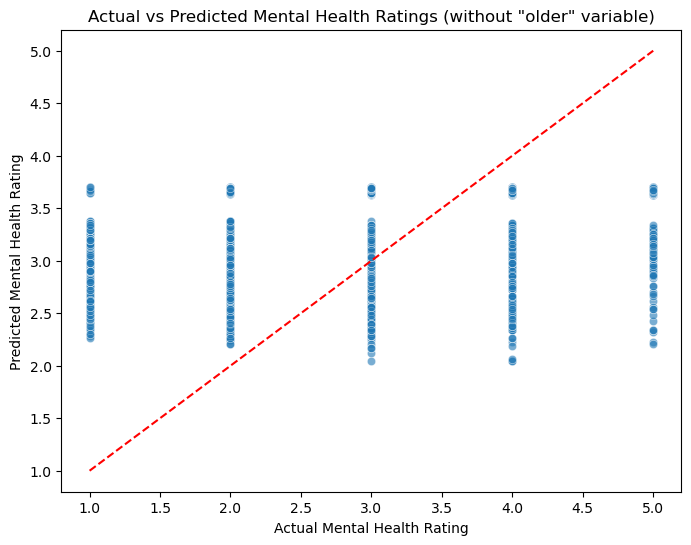

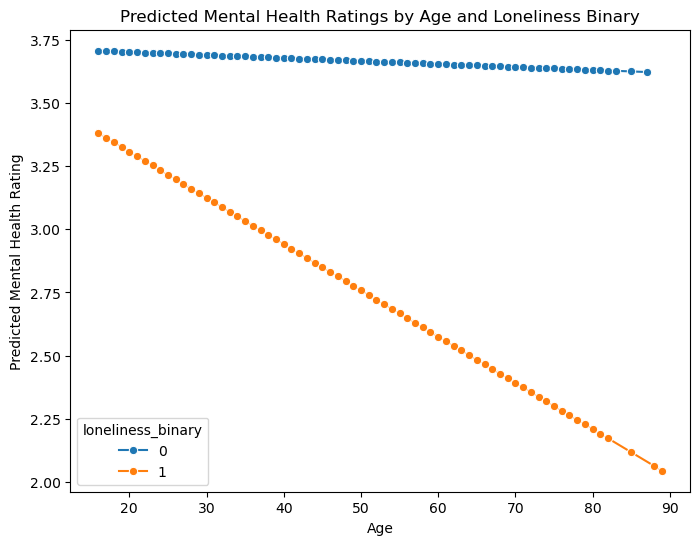

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['WELLNESS_self_rated_mental_health_numeric'], y=data['predicted_values'], alpha=0.6)
plt.plot([data['WELLNESS_self_rated_mental_health_numeric'].min(), data['WELLNESS_self_rated_mental_health_numeric'].max()],
         [data['WELLNESS_self_rated_mental_health_numeric'].min(), data['WELLNESS_self_rated_mental_health_numeric'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Mental Health Rating')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Actual vs Predicted Mental Health Ratings (without "older" variable)')
plt.show()

# Optionally, you can also plot the effect of the interaction term
plt.figure(figsize=(8, 6))
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

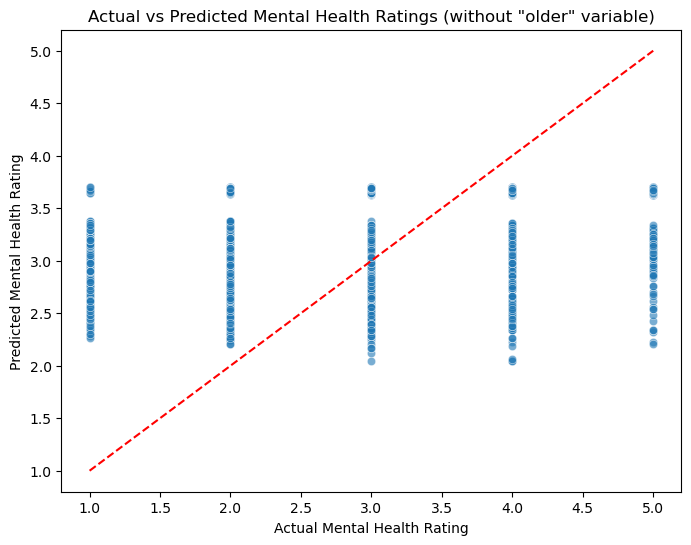

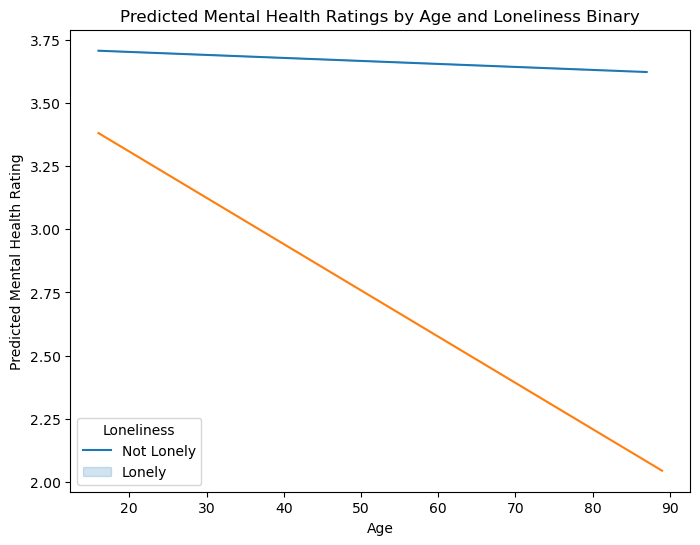

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['WELLNESS_self_rated_mental_health_numeric'], y=data['predicted_values'], alpha=0.6)
plt.plot([data['WELLNESS_self_rated_mental_health_numeric'].min(), data['WELLNESS_self_rated_mental_health_numeric'].max()],
         [data['WELLNESS_self_rated_mental_health_numeric'].min(), data['WELLNESS_self_rated_mental_health_numeric'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Mental Health Rating')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Actual vs Predicted Mental Health Ratings (without "older" variable)')
plt.show()

# Optionally, you can also plot the effect of the interaction term with solid lines and custom legend
plt.figure(figsize=(8, 6))
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'], 
             style=data['loneliness_binary'], markers=False, dashes=False)

# Customize legend labels
plt.legend(title='Loneliness', labels=['Not Lonely', 'Lonely'])

plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

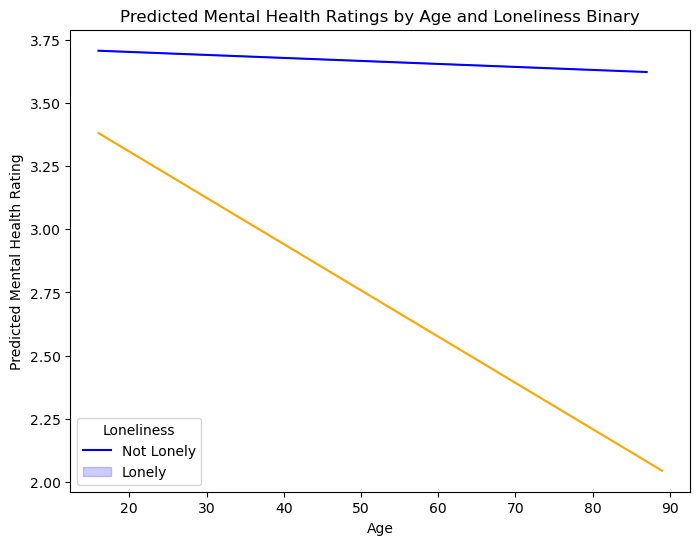

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Plot the effect of age and loneliness on predicted values
plt.figure(figsize=(8, 6))

# Create the lineplot with correct hues and solid lines
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'],
             palette={0: 'blue', 1: 'orange'}, style=data['loneliness_binary'], markers=False, dashes=False)

# Customize the legend to show 'Not Lonely' and 'Lonely'
plt.legend(title='Loneliness', labels=['Not Lonely', 'Lonely'])

plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

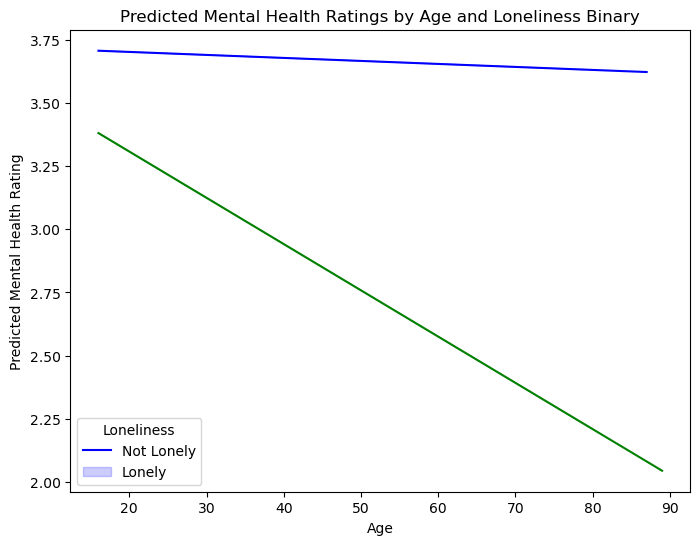

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Plot the effect of age and loneliness on predicted values
plt.figure(figsize=(8, 6))

# Create the lineplot with correct hues and solid lines, set the colors to green and blue
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'],
             palette={0: 'blue', 1: 'green'}, style=data['loneliness_binary'], markers=False, dashes=False)

# Customize the legend to show 'Not Lonely' and 'Lonely'
plt.legend(title='Loneliness', labels=['Not Lonely', 'Lonely'], loc='best')

plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

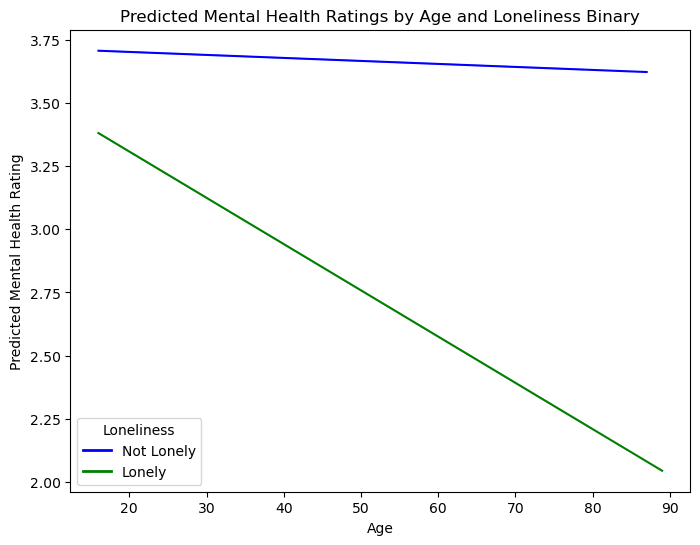

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Plot the effect of age and loneliness on predicted values
plt.figure(figsize=(8, 6))

# Create the lineplot with correct hues and solid lines, set the colors to green and blue
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'],
             palette={0: 'blue', 1: 'green'}, style=data['loneliness_binary'], markers=False, dashes=False)

# Manually define legend handles with the exact colors we want
legend_handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='green', lw=2)]
plt.legend(handles=legend_handles, title='Loneliness', labels=['Not Lonely', 'Lonely'], loc='best')

plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

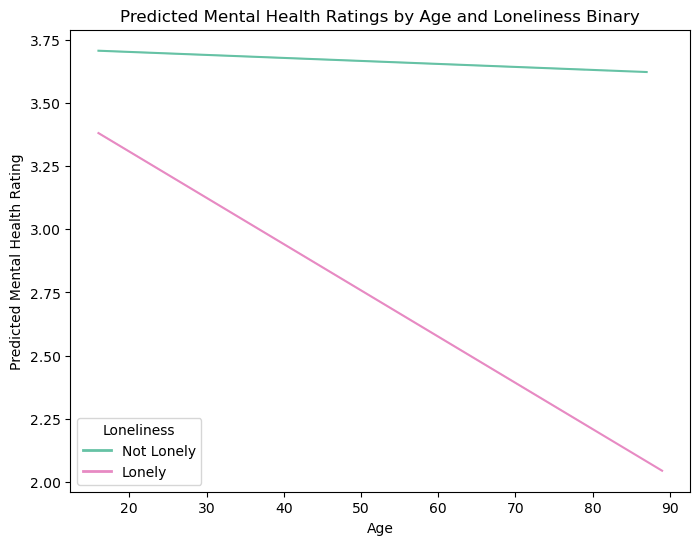

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Define the color palette (Set2)
palette = sns.color_palette("Set2")

# Plot the effect of age and loneliness on predicted values
plt.figure(figsize=(8, 6))

# Create the lineplot with the specified color palette and style
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'],
             palette={0: palette[0], 1: palette[3]}, style=data['loneliness_binary'], markers=False, dashes=False)

# Manually define legend handles with the exact colors we want
legend_handles = [Line2D([0], [0], color=palette[0], lw=2), Line2D([0], [0], color=palette[3], lw=2)]
plt.legend(handles=legend_handles, title='Loneliness', labels=['Not Lonely', 'Lonely'], loc='best')

plt.xlabel('Age')
plt.ylabel('Predicted Mental Health Rating')
plt.title('Predicted Mental Health Ratings by Age and Loneliness Binary')
plt.show()

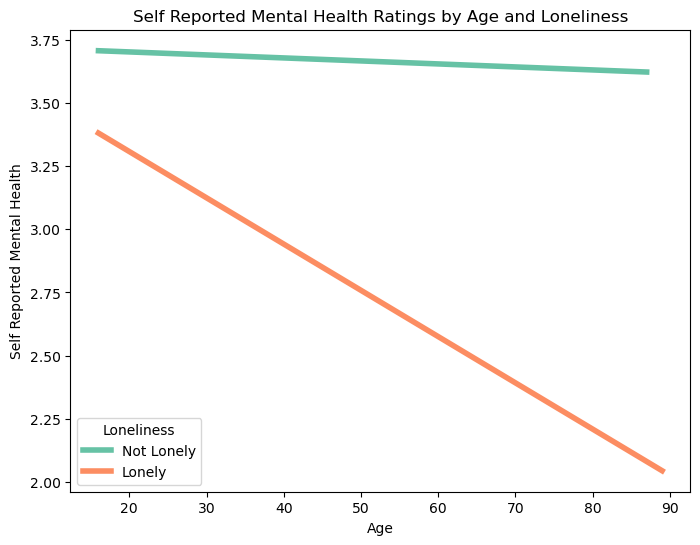

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Get the predicted values from the model without 'older'
data['predicted_values'] = model_without_older.fittedvalues

# Define the color palette (Set2)
palette = sns.color_palette("Set2")

# Plot the effect of age and loneliness on predicted values
plt.figure(figsize=(8, 6))

# Create the lineplot with the specified color palette and style, with thicker lines
sns.lineplot(x=data['DEMO_age'], y=data['predicted_values'], hue=data['loneliness_binary'],
             palette={0: palette[0], 1: palette[1]}, style=data['loneliness_binary'], markers=False,
             dashes=False, linewidth=4)  # Set linewidth to 3 for thicker lines

# Manually define legend handles with the exact colors we want
legend_handles = [Line2D([0], [0], color=palette[0], lw=4), Line2D([0], [0], color=palette[1], lw=4)]
plt.legend(handles=legend_handles, title='Loneliness', labels=['Not Lonely', 'Lonely'], loc='best')

plt.xlabel('Age')
plt.ylabel('Self Reported Mental Health')
plt.title('Self Reported Mental Health Ratings by Age and Loneliness')
plt.show()

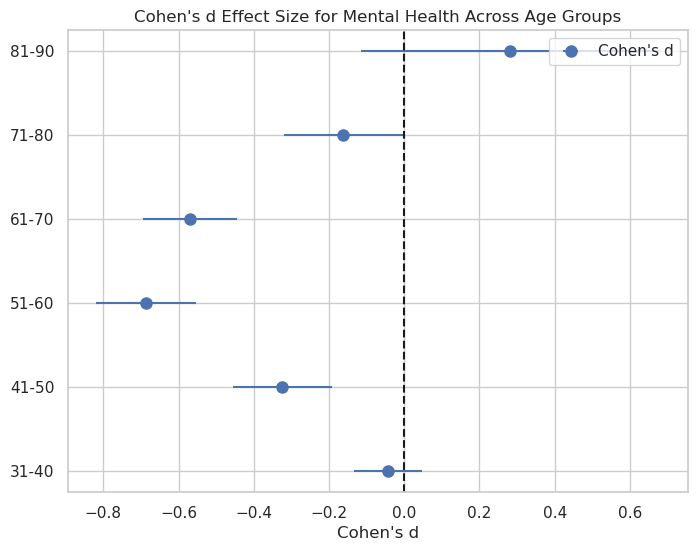

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'data' is your DataFrame and 'WELLNESS_self_rated_mental_health_numeric' is the dependent variable

# Define age group bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Assign age group labels
data['age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Prepare to store Cohen's d values
cohen_d_results = []

# Loop through each age group and compute Cohen's d
for age_group in age_labels[1:]:  # Start from the second group to compare with the first group
    group_data = data[data['age_group'] == age_group]['WELLNESS_self_rated_mental_health_numeric']
    reference_group_data = data[data['age_group'] == age_labels[0]]['WELLNESS_self_rated_mental_health_numeric']
    
    # Skip groups with zero observations
    if len(group_data) == 0 or len(reference_group_data) == 0:
        continue
    
    # Mean and standard deviation for the two groups
    mean_group = group_data.mean()
    mean_reference = reference_group_data.mean()
    std_group = group_data.std()
    std_reference = reference_group_data.std()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_group**2) + (std_reference**2)) / 2)
    
    # Cohen's d
    cohen_d = (mean_group - mean_reference) / pooled_std
    
    # 95% Confidence Interval for Cohen's d
    n_group = len(group_data)
    n_reference = len(reference_group_data)
    se_d = np.sqrt((n_group + n_reference) / (n_group * n_reference) + cohen_d**2 / (2 * (n_group + n_reference)))
    ci_lower, ci_upper = cohen_d - 1.96 * se_d, cohen_d + 1.96 * se_d
    
    # Append result
    cohen_d_results.append([age_group, cohen_d, ci_lower, ci_upper])

# Create a DataFrame to hold the results
cohen_d_df = pd.DataFrame(cohen_d_results, columns=['Age Group', 'Cohen\'s d', 'CI Lower', 'CI Upper'])

# Plot the forest plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot the effect sizes and confidence intervals
plt.errorbar(cohen_d_df['Cohen\'s d'], range(len(cohen_d_df)), xerr=[cohen_d_df['Cohen\'s d'] - cohen_d_df['CI Lower'],
                                                                 cohen_d_df['CI Upper'] - cohen_d_df['Cohen\'s d']],
             fmt='o', color='b', markersize=8, linestyle='None', label='Cohen\'s d')

# Set labels and title
plt.yticks(range(len(cohen_d_df)), cohen_d_df['Age Group'])
plt.xlabel("Cohen's d")
plt.title("Cohen's d Effect Size for Mental Health Across Age Groups")
plt.axvline(x=0, color='k', linestyle='--')  # Line at d=0 for reference

# Add legend and show plot
plt.legend()
plt.show()

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'data' is your DataFrame and 'WELLNESS_self_rated_mental_health_numeric' is the dependent variable

# Define age group bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Assign age group labels
data['age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Prepare to store Cohen's d values
cohen_d_results = []

# Loop through each age group and compute Cohen's d
for age_group in age_labels[1:]:  # Start from the second group to compare with the first group
    group_data = data[data['age_group'] == age_group]['WELLNESS_self_rated_mental_health_numeric']
    reference_group_data = data[data['age_group'] == age_labels[0]]['WELLNESS_self_rated_mental_health_numeric']
    
    # Skip groups with zero observations
    if len(group_data) == 0 or len(reference_group_data) == 0:
        continue
    
    # Mean and standard deviation for the two groups
    mean_group = group_data.mean()
    mean_reference = reference_group_data.mean()
    std_group = group_data.std()
    std_reference = reference_group_data.std()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_group**2) + (std_reference**2)) / 2)
    
    # Cohen's d
    cohen_d = (mean_group - mean_reference) / pooled_std
    
    # 95% Confidence Interval for Cohen's d
    n_group = len(group_data)
    n_reference = len(reference_group_data)
    se_d = np.sqrt((n_group + n_reference) / (n_group * n_reference) + cohen_d**2 / (2 * (n_group + n_reference)))
    ci_lower, ci_upper = cohen_d - 1.96 * se_d, cohen_d + 1.96 * se_d
    
    # Append result
    cohen_d_results.append([age_group, cohen_d, ci_lower, ci_upper])

# Create a DataFrame to hold the results
cohen_d_df = pd.DataFrame(cohen_d_results, columns=['Age Group', 'Cohen\'s d', 'CI Lower', 'CI Upper'])

# Display the table of Cohen's d values
print(cohen_d_df)

# Optional: You can also display this in a formatted table within your notebook
import tabulate
print(tabulate.tabulate(cohen_d_df, headers='keys', tablefmt='psql', showindex=False))

  Age Group  Cohen's d  CI Lower  CI Upper
0     31-40  -0.042012 -0.132235  0.048210
1     41-50  -0.323640 -0.455174 -0.192105
2     51-60  -0.686394 -0.819626 -0.553161
3     61-70  -0.570320 -0.695641 -0.445000
4     71-80  -0.162020 -0.319634 -0.004407
5     81-90   0.281452 -0.115560  0.678464


ModuleNotFoundError: No module named 'tabulate'

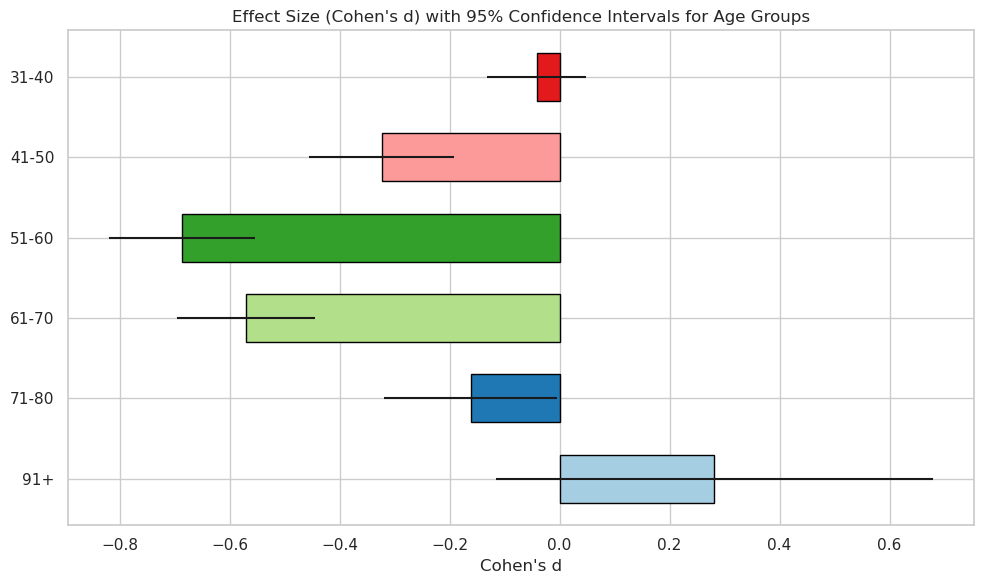

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'WELLNESS_self_rated_mental_health_numeric' is the dependent variable

# Define age group bins and labels (removing 81-90)
age_bins = [18, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '91+']

# Assign age group labels
data['age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Prepare to store Cohen's d values
cohen_d_results = []

# Loop through each age group and compute Cohen's d
for age_group in age_labels[1:]:  # Start from the second group to compare with the first group
    group_data = data[data['age_group'] == age_group]['WELLNESS_self_rated_mental_health_numeric']
    reference_group_data = data[data['age_group'] == age_labels[0]]['WELLNESS_self_rated_mental_health_numeric']
    
    # Skip groups with zero observations
    if len(group_data) == 0 or len(reference_group_data) == 0:
        continue
    
    # Mean and standard deviation for the two groups
    mean_group = group_data.mean()
    mean_reference = reference_group_data.mean()
    std_group = group_data.std()
    std_reference = reference_group_data.std()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_group**2) + (std_reference**2)) / 2)
    
    # Cohen's d
    cohen_d = (mean_group - mean_reference) / pooled_std
    
    # 95% Confidence Interval for Cohen's d
    n_group = len(group_data)
    n_reference = len(reference_group_data)
    se_d = np.sqrt((n_group + n_reference) / (n_group * n_reference) + cohen_d**2 / (2 * (n_group + n_reference)))
    ci_lower, ci_upper = cohen_d - 1.96 * se_d, cohen_d + 1.96 * se_d
    
    # Append result
    cohen_d_results.append([age_group, cohen_d, ci_lower, ci_upper])

# Create a DataFrame to hold the results
cohen_d_df = pd.DataFrame(cohen_d_results, columns=['Age Group', 'Cohen\'s d', 'CI Lower', 'CI Upper'])

# Reverse the order of age groups for the plot
cohen_d_df = cohen_d_df[::-1]

# Plot the forest plot using Seaborn color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Paired", len(cohen_d_df))

# Create a horizontal bar plot for Cohen's d with confidence intervals
plt.barh(cohen_d_df['Age Group'], cohen_d_df['Cohen\'s d'], xerr=[cohen_d_df['Cohen\'s d'] - cohen_d_df['CI Lower'], cohen_d_df['CI Upper'] - cohen_d_df['Cohen\'s d']], 
         color=palette, edgecolor='black', height=0.6)

# Add labels and title
plt.xlabel('Cohen\'s d')
plt.title('Effect Size (Cohen\'s d) with 95% Confidence Intervals for Age Groups')

# Display the plot
plt.tight_layout()
plt.show()

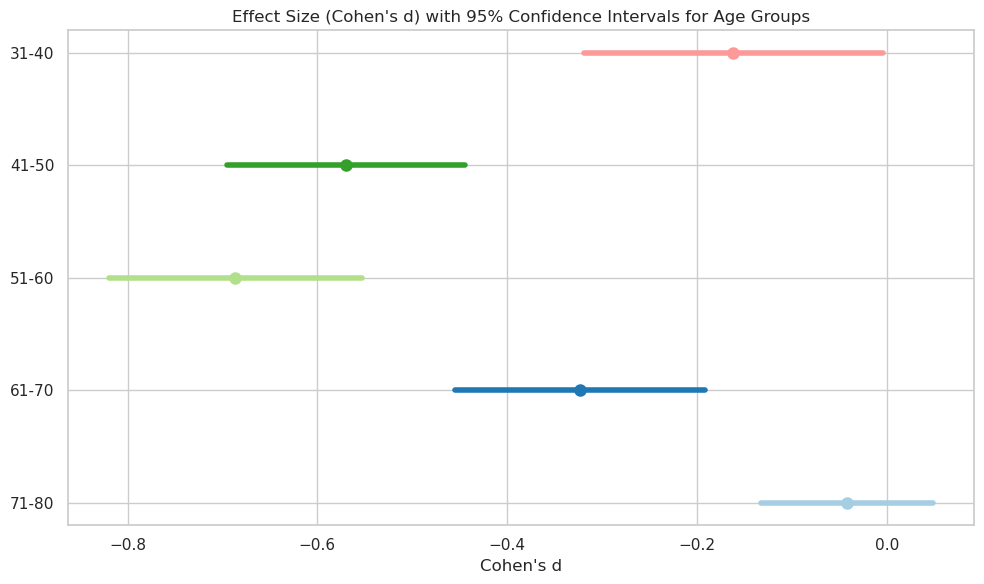

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'WELLNESS_self_rated_mental_health_numeric' is the dependent variable

# Define age group bins and labels (removing 90+ group)
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Assign age group labels
data['age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Prepare to store Cohen's d values
cohen_d_results = []

# Loop through each age group and compute Cohen's d
for age_group in age_labels[1:]:  # Start from the second group to compare with the first group
    group_data = data[data['age_group'] == age_group]['WELLNESS_self_rated_mental_health_numeric']
    reference_group_data = data[data['age_group'] == age_labels[0]]['WELLNESS_self_rated_mental_health_numeric']
    
    # Skip groups with zero observations
    if len(group_data) == 0 or len(reference_group_data) == 0:
        continue
    
    # Mean and standard deviation for the two groups
    mean_group = group_data.mean()
    mean_reference = reference_group_data.mean()
    std_group = group_data.std()
    std_reference = reference_group_data.std()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_group**2) + (std_reference**2)) / 2)
    
    # Cohen's d
    cohen_d = (mean_group - mean_reference) / pooled_std
    
    # 95% Confidence Interval for Cohen's d
    n_group = len(group_data)
    n_reference = len(reference_group_data)
    se_d = np.sqrt((n_group + n_reference) / (n_group * n_reference) + cohen_d**2 / (2 * (n_group + n_reference)))
    ci_lower, ci_upper = cohen_d - 1.96 * se_d, cohen_d + 1.96 * se_d
    
    # Append result
    cohen_d_results.append([age_group, cohen_d, ci_lower, ci_upper])

# Create a DataFrame to hold the results
cohen_d_df = pd.DataFrame(cohen_d_results, columns=['Age Group', 'Cohen\'s d', 'CI Lower', 'CI Upper'])

# Reverse the order of age groups for the plot
cohen_d_df = cohen_d_df[::-1]

# Plot the forest plot using Seaborn color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Paired", len(cohen_d_df))

# Create a horizontal line plot for Cohen's d with confidence intervals
for i, row in cohen_d_df.iterrows():
    plt.plot([row['CI Lower'], row['CI Upper']], [i, i], color=palette[i], lw=4)  # Confidence intervals
    plt.plot(row['Cohen\'s d'], i, marker='o', color=palette[i], markersize=8)  # Cohen's d

# Add labels and title
plt.xlabel('Cohen\'s d')
plt.title('Effect Size (Cohen\'s d) with 95% Confidence Intervals for Age Groups')

# Set the y-axis ticks to the age group labels
plt.yticks(range(len(cohen_d_df)), cohen_d_df['Age Group'])

# Display the plot
plt.tight_layout()
plt.show()

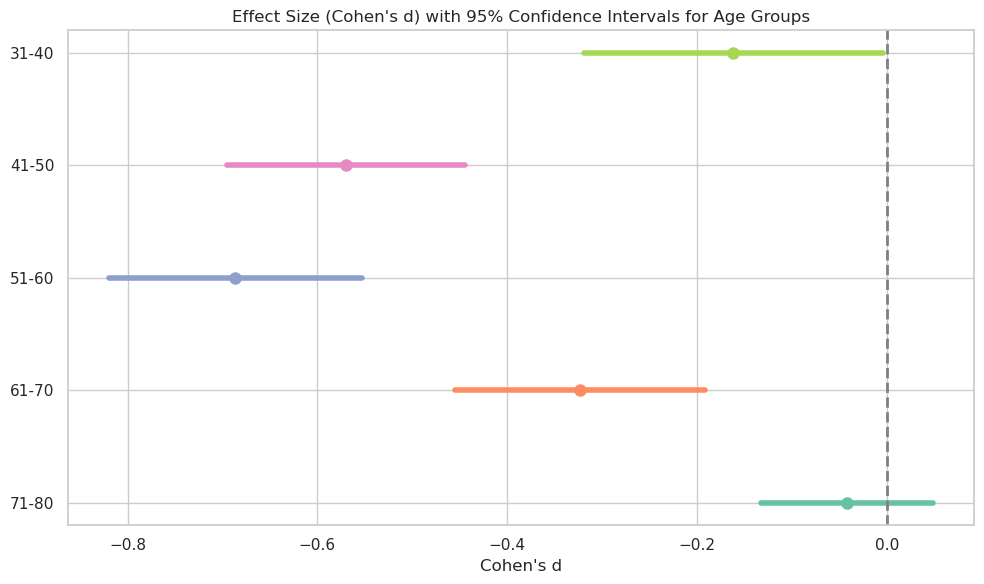

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'WELLNESS_self_rated_mental_health_numeric' is the dependent variable

# Define age group bins and labels (removing 90+ group)
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Assign age group labels
data['age_group'] = pd.cut(data['DEMO_age'], bins=age_bins, labels=age_labels, right=False)

# Prepare to store Cohen's d values
cohen_d_results = []

# Loop through each age group and compute Cohen's d
for age_group in age_labels[1:]:  # Start from the second group to compare with the first group
    group_data = data[data['age_group'] == age_group]['WELLNESS_self_rated_mental_health_numeric']
    reference_group_data = data[data['age_group'] == age_labels[0]]['WELLNESS_self_rated_mental_health_numeric']
    
    # Skip groups with zero observations
    if len(group_data) == 0 or len(reference_group_data) == 0:
        continue
    
    # Mean and standard deviation for the two groups
    mean_group = group_data.mean()
    mean_reference = reference_group_data.mean()
    std_group = group_data.std()
    std_reference = reference_group_data.std()
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_group**2) + (std_reference**2)) / 2)
    
    # Cohen's d
    cohen_d = (mean_group - mean_reference) / pooled_std
    
    # 95% Confidence Interval for Cohen's d
    n_group = len(group_data)
    n_reference = len(reference_group_data)
    se_d = np.sqrt((n_group + n_reference) / (n_group * n_reference) + cohen_d**2 / (2 * (n_group + n_reference)))
    ci_lower, ci_upper = cohen_d - 1.96 * se_d, cohen_d + 1.96 * se_d
    
    # Append result
    cohen_d_results.append([age_group, cohen_d, ci_lower, ci_upper])

# Create a DataFrame to hold the results
cohen_d_df = pd.DataFrame(cohen_d_results, columns=['Age Group', 'Cohen\'s d', 'CI Lower', 'CI Upper'])

# Reverse the order of age groups for the plot
cohen_d_df = cohen_d_df[::-1]

# Plot the forest plot using Seaborn color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", len(cohen_d_df))

# Create a horizontal line plot for Cohen's d with confidence intervals
for i, row in cohen_d_df.iterrows():
    plt.plot([row['CI Lower'], row['CI Upper']], [i, i], color=palette[i], lw=4)  # Confidence intervals
    plt.plot(row['Cohen\'s d'], i, marker='o', color=palette[i], markersize=8)  # Cohen's d

# Add a dotted line through zero
plt.axvline(0, color='gray', linestyle='--', lw=2)

# Add labels and title
plt.xlabel('Cohen\'s d')
plt.title('Effect Size (Cohen\'s d) with 95% Confidence Intervals for Age Groups')

# Set the y-axis ticks to the age group labels
plt.yticks(range(len(cohen_d_df)), cohen_d_df['Age Group'])

# Display the plot
plt.tight_layout()
plt.show()